<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Status" data-toc-modified-id="Status-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Status</a></span><ul class="toc-item"><li><span><a href="#Reminders" data-toc-modified-id="Reminders-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Reminders</a></span></li></ul></li><li><span><a href="#Load" data-toc-modified-id="Load-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#2-Nodes" data-toc-modified-id="2-Nodes-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>2 Nodes</a></span><ul class="toc-item"><li><span><a href="#Initial-setup" data-toc-modified-id="Initial-setup-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Initial setup</a></span></li><li><span><a href="#New-Init" data-toc-modified-id="New-Init-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>New Init</a></span></li><li><span><a href="#New-Init-with-step" data-toc-modified-id="New-Init-with-step-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>New Init with step</a></span></li></ul></li><li><span><a href="#New-init-with-10-Nodes" data-toc-modified-id="New-init-with-10-Nodes-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>New init with 10 Nodes</a></span></li><li><span><a href="#Does-the-new-init-give-us-exactly-the-same-assignment-if-we-give-exactly-the-same-r_i?" data-toc-modified-id="Does-the-new-init-give-us-exactly-the-same-assignment-if-we-give-exactly-the-same-r_i?-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Does the new init give us <strong>exactly</strong> the same assignment if we give <strong>exactly</strong> the same r_i?</a></span><ul class="toc-item"><li><span><a href="#2-Nodes" data-toc-modified-id="2-Nodes-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>2 Nodes</a></span></li><li><span><a href="#10-Nodes" data-toc-modified-id="10-Nodes-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>10 Nodes</a></span></li><li><span><a href="#Validation-L-=-100000" data-toc-modified-id="Validation-L-=-100000-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Validation L = 100000</a></span></li><li><span><a href="#Validation-L-=-100000" data-toc-modified-id="Validation-L-=-100000-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Validation L = 100000</a></span></li></ul></li><li><span><a href="#Quickly-re-convincing-myself-that-the-init-was-working" data-toc-modified-id="Quickly-re-convincing-myself-that-the-init-was-working-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Quickly re-convincing myself that the init was working</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Checking-the-way-we-compute-the-balance" data-toc-modified-id="Checking-the-way-we-compute-the-balance-6.0.1"><span class="toc-item-num">6.0.1&nbsp;&nbsp;</span>Checking the way we compute the balance</a></span></li></ul></li></ul></li></ul></div>

# Status

This document is an **update** on the other version with the same title. 

It stems from the fact that we realized that
- the initialization was indeed providing a feasible point
- but it was adding too many constraints (forcing also the nodes in excess to be perfectly rebalanced, therefore losing the progress we made thus far). 

This notebook therefore aims to make sure this routine works properly before updating the other notebooks. 

## Reminders

**Reminder**: how are the ri computed? 
- Initialization of all ri to 0
- We loop through the nodes
    - for the origin of the edge, we add the flow
    - for the destination of the edge, we substract the flow

Therefore, 
- A node with ri>0 is a node that is in deficit of rebalancers
- A node with ri<0 is a node that is in excess of rebalancers


**Reminder**: how do we update OD? 
- We add a pair $(n,R)$ for each node $n$ that is in excess. 

Currently we are solving the following problem: 
$$
\min_{f} \|f-f_r\| \\
\text{s.t.    } A_{in} f - A_{out} f = r\\
\text{        } f_R =  f_o^{net}\\
f\geq 0
$$

**IMPORTANT NOTE** the $r$ vector here only now only contains the nodes that are in **exces**. 

The second-last equation simply means that the flow on the rebalancing edge must be equal to the net rebalancing flow at the origin node of that edge. 

I believe the problem we solve is the right one. How can we explain that we do not see any improvement in the balance, though? 

# Load

In [3]:
%load_ext autoreload
%autoreload 2
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os
import pandas as pd

from amod_ed.result_analysis import plot_ri, print_final_flows, plot_cost_all_path, plot_ri_list, plot_balance_list
from amod_ed.result_analysis import plot_stop_and_cost

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
subfolder='updated_init'

# 2 Nodes

the problem with only two nodes is that it might be a bit too "simplistic" ? 

In [5]:
n_nodes=2

In [6]:
path='Data/'+str(n_nodes)+'Nodes_back2basics/outputs/'+subfolder

In [7]:
print(os.listdir(path))

['line_search_notNNinit_longerNI.pkl', 'initial_setup.pkl', 'line_search_notNNinit.pkl', 'output_L_1000000_ni_100_no_20_ev_0_relative_progress_fu_False.pkl']


In [9]:
with open(os.path.join(path, 'initial_setup.pkl'), 'rb') as f:
        G_FW1, OD, ri_FW1, n_outer, n_inner, balance1, opt_res1, OD_list, balance_list1, params = pickle.load(f)

In [10]:
with open(os.path.join(path, 'new_init.pkl'), 'rb') as f:
        G_FW2, OD, ri_FW2, n_outer, n_inner, balance2, opt_res2, OD_list, balance_list2, params = pickle.load(f)

## Initial setup

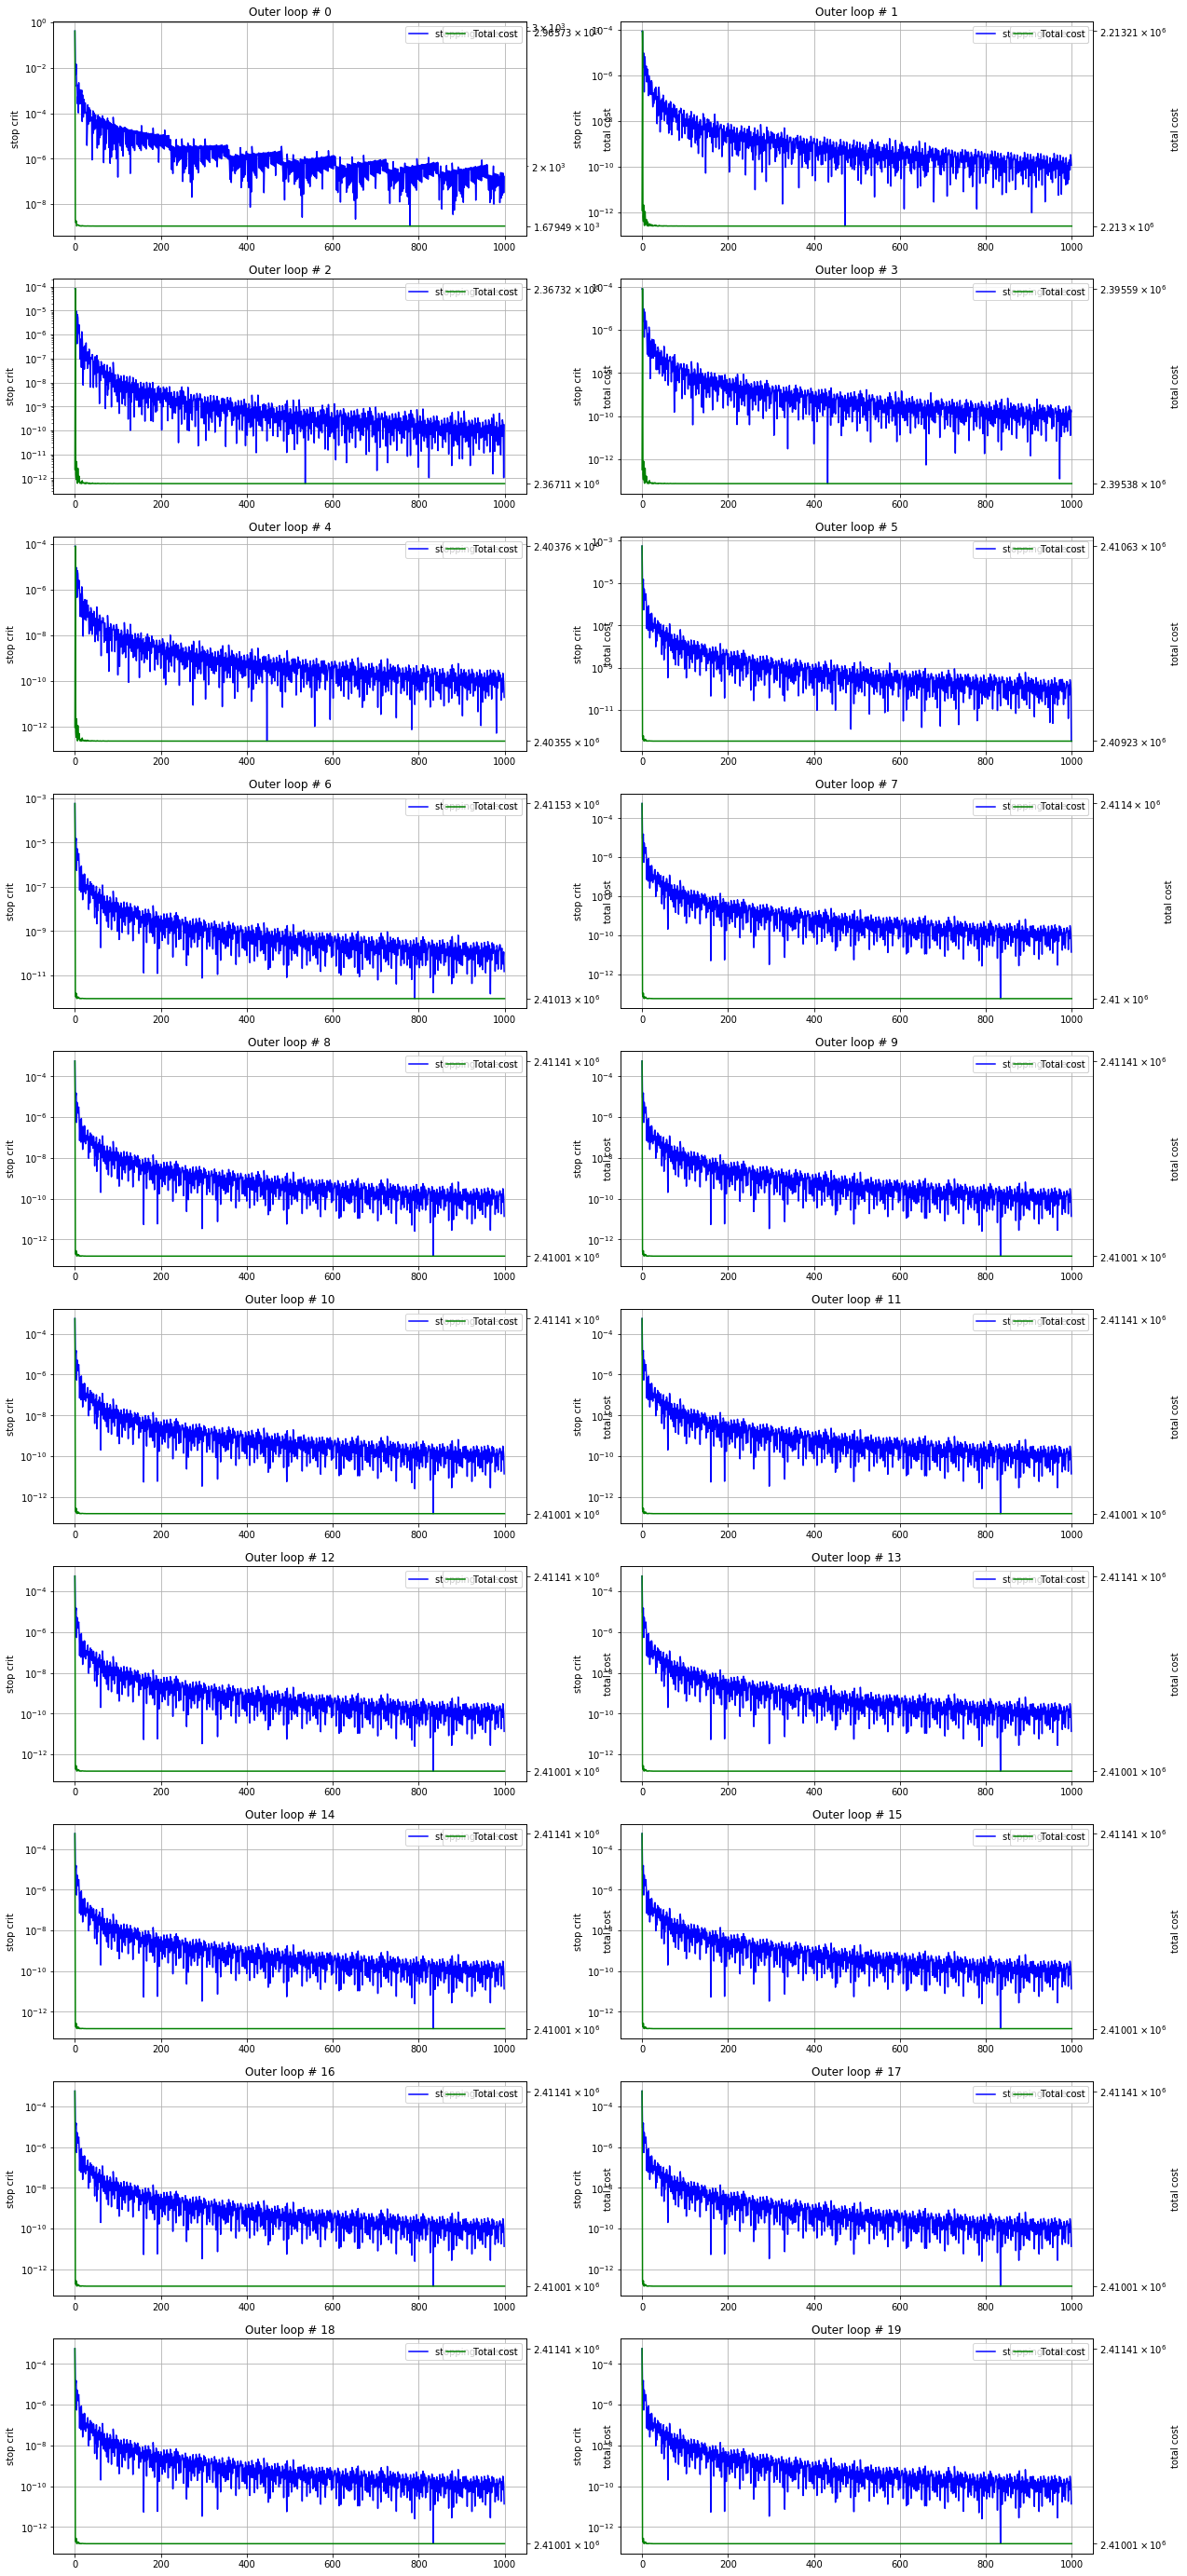

In [11]:
plot_stop_and_cost(opt_res1)

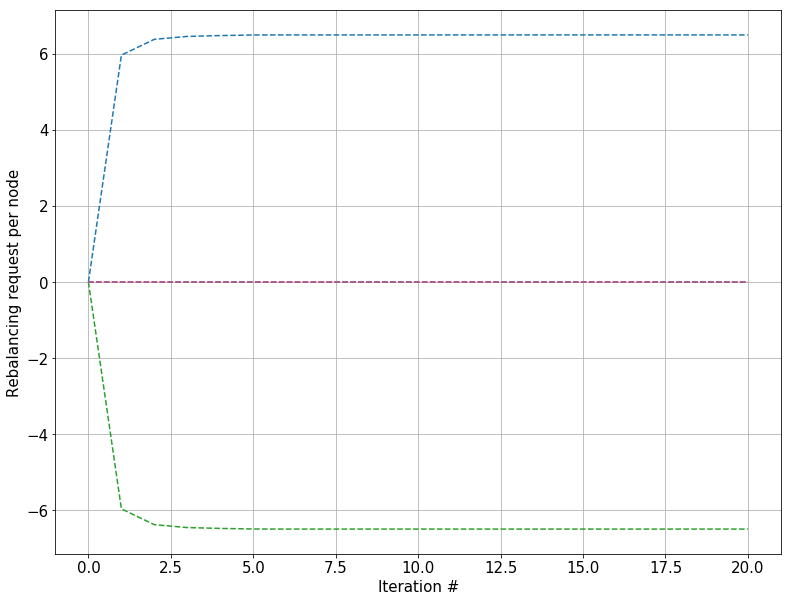

In [12]:
plot_ri_list(ri_FW1, save = False, path = None)

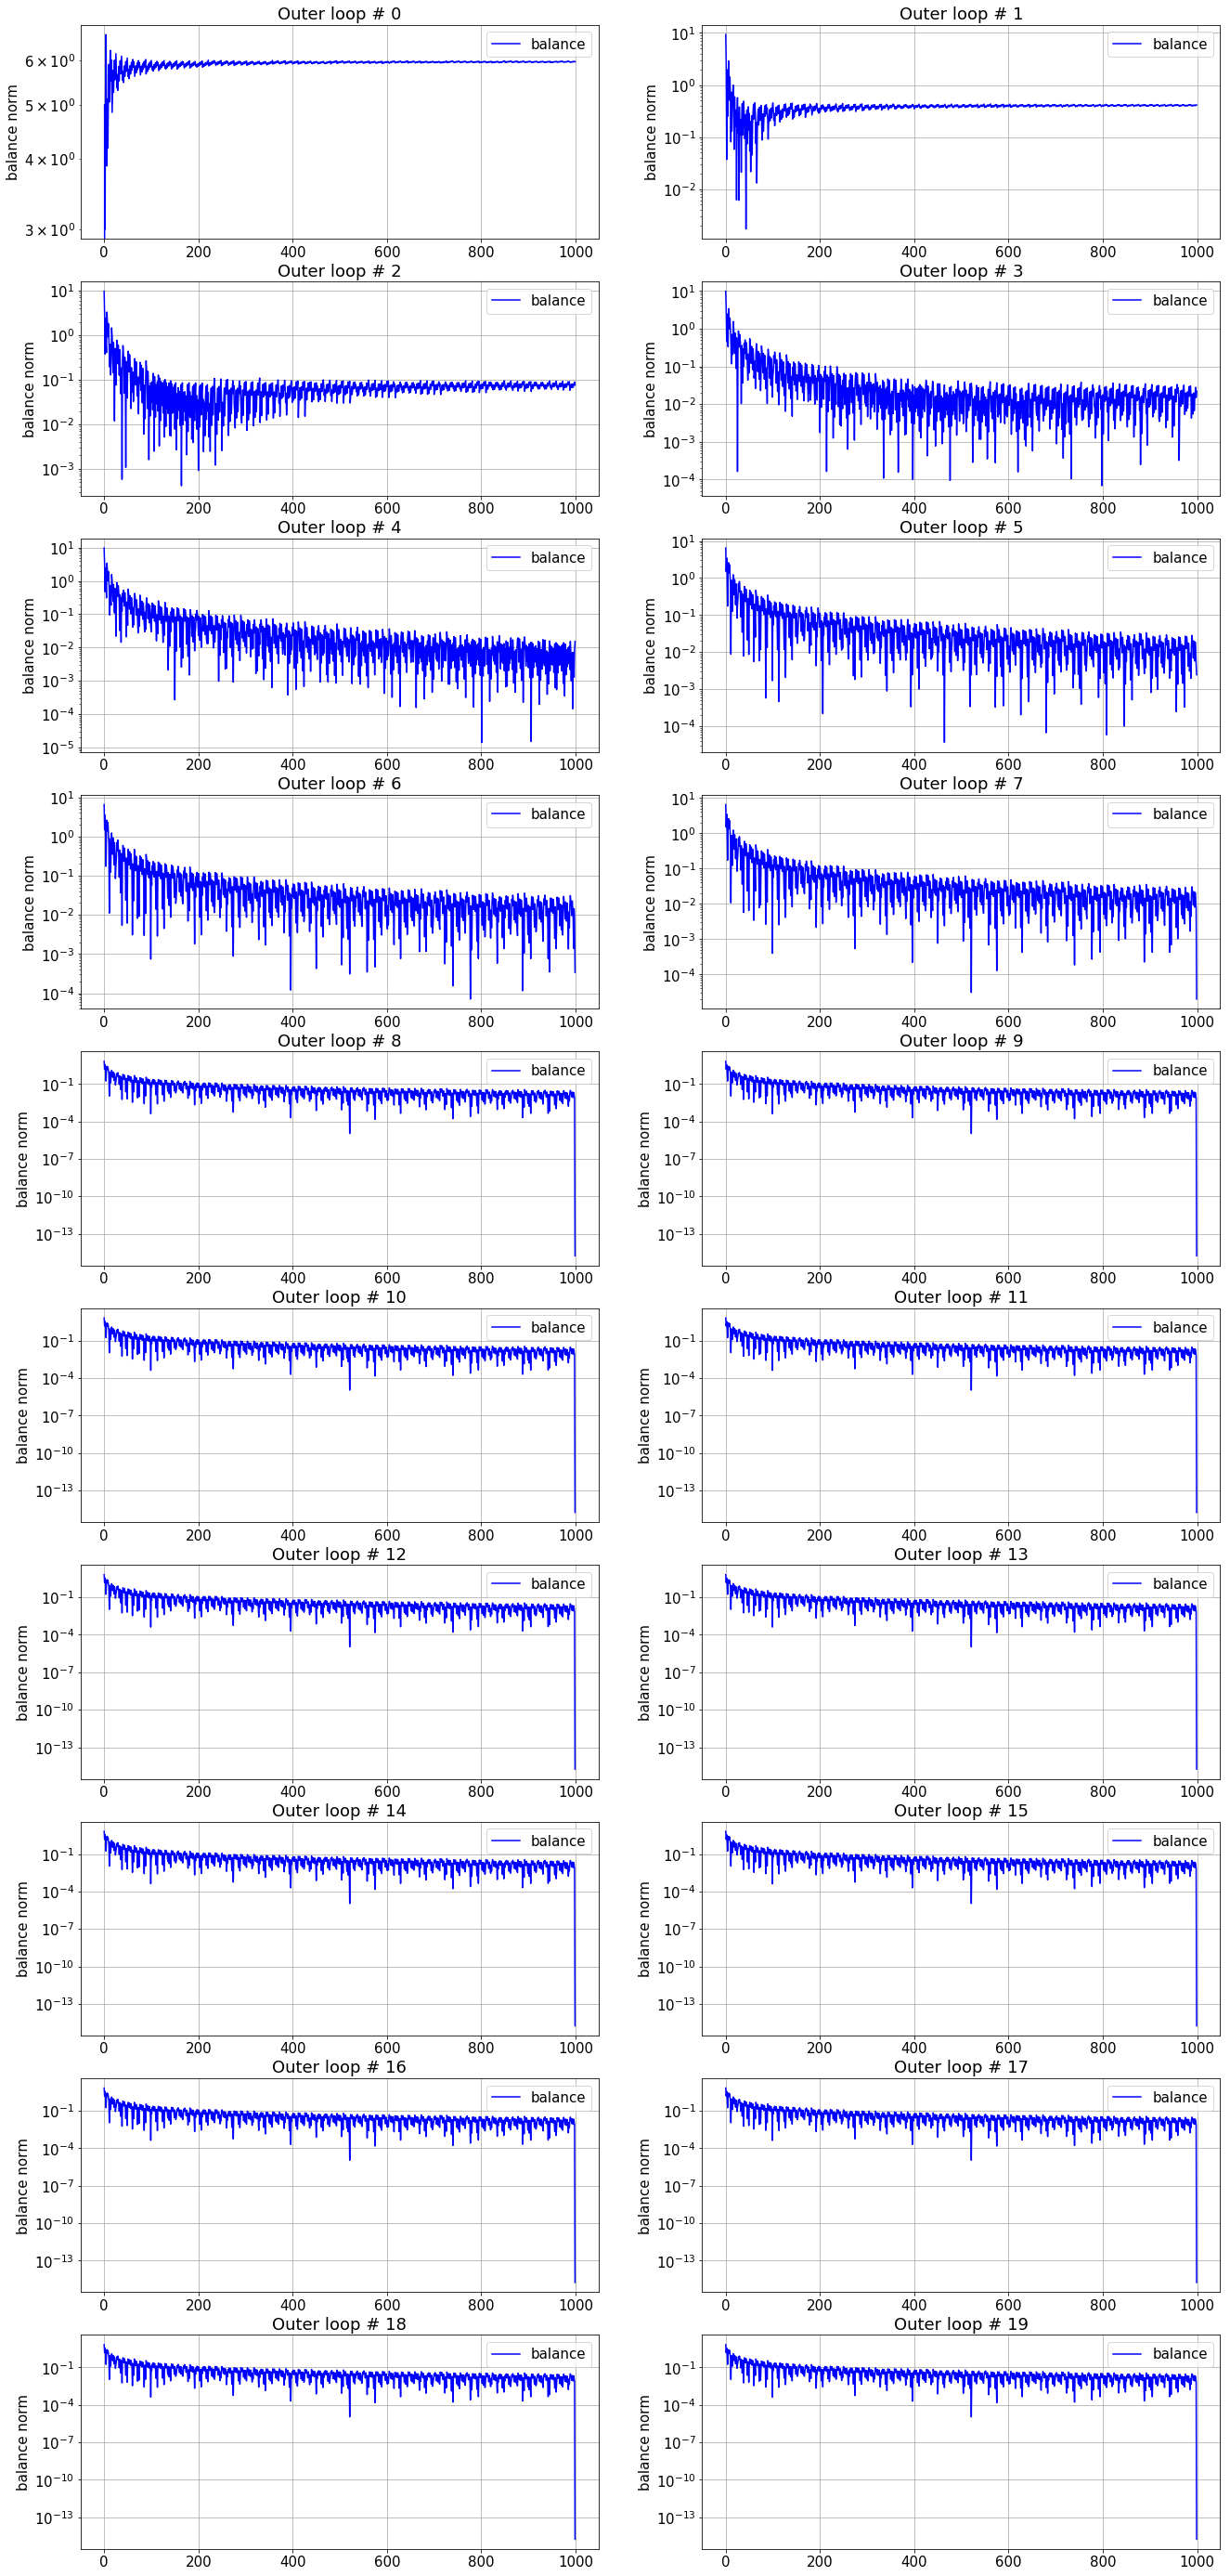

In [13]:
plot_balance_list(balance_list1, b_scale='log')

I believe the problem we solve is the right one. How can we explain that we do not see any improvement in the balance, though? 

No handles with labels found to put in legend.


Text(0, 0.5, 'Balance Norm')

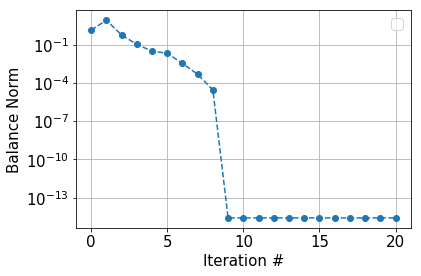

In [14]:
b=np.linalg.norm(balance1, axis=1)
plt.plot(np.array(b), 'o--')
plt.grid(True)
plt.legend()
plt.yscale('log')
plt.xticks(np.arange(0, 21, step=5))
plt.xlabel('Iteration #')
plt.ylabel('Balance Norm')

## New Init

/Users/lucasfuentes/anaconda3/lib/python3.6/site-packages/matplotlib/ticker.py:2241: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


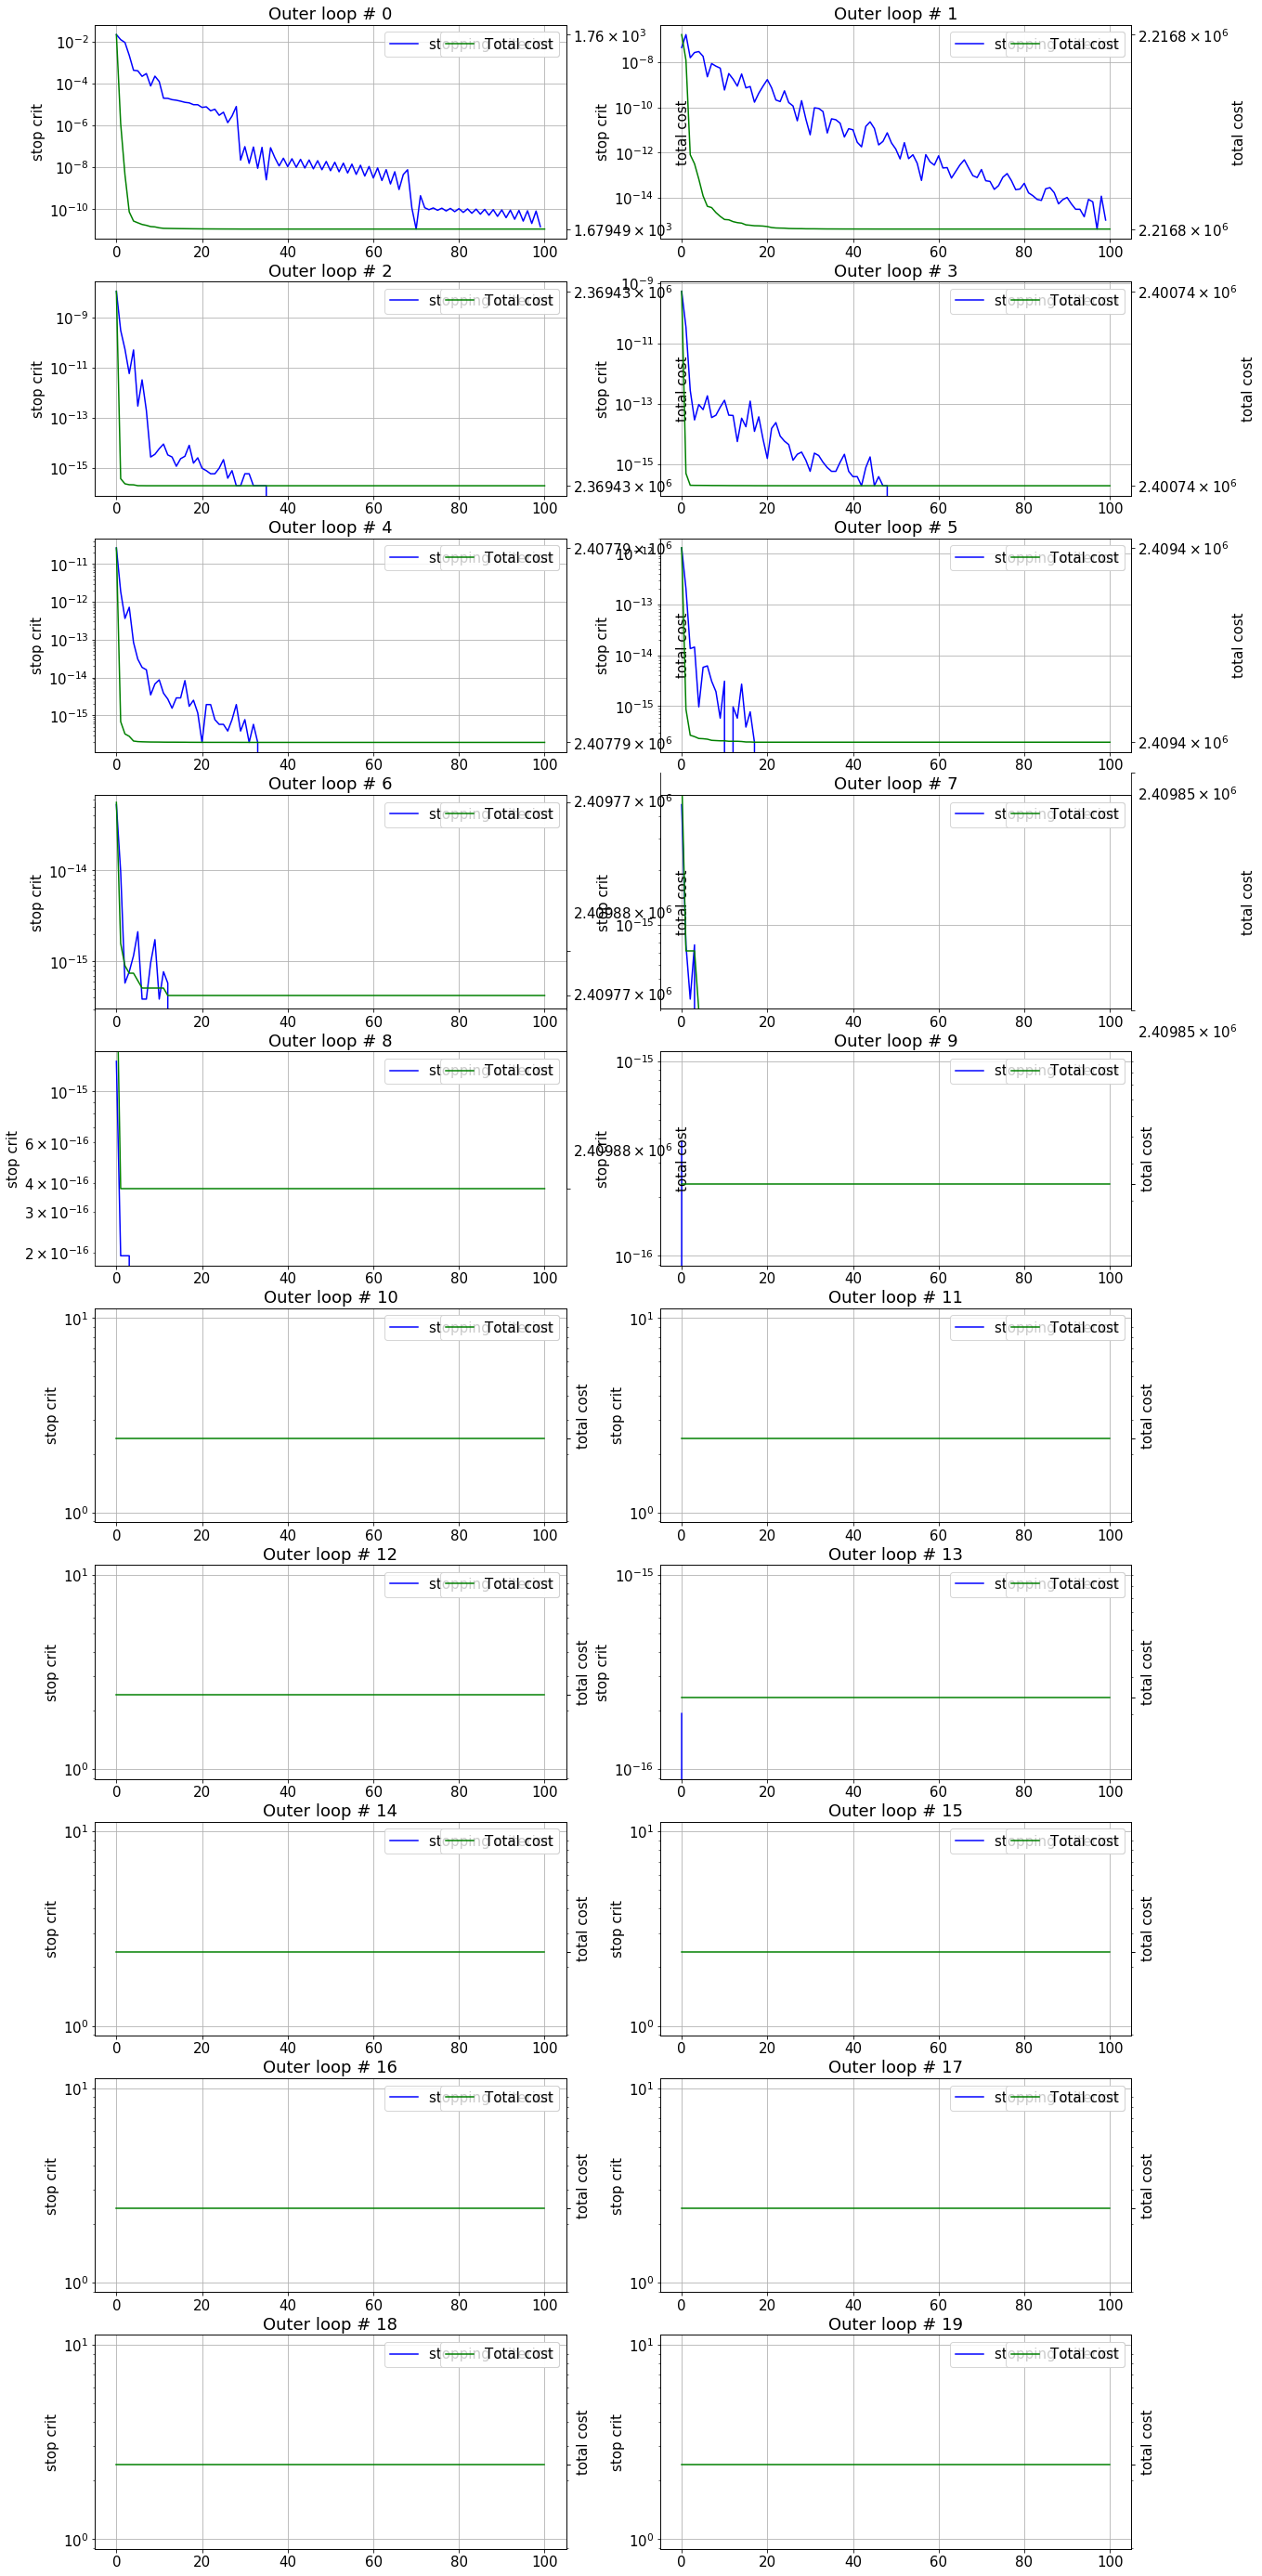

In [15]:
plot_stop_and_cost(opt_res2)

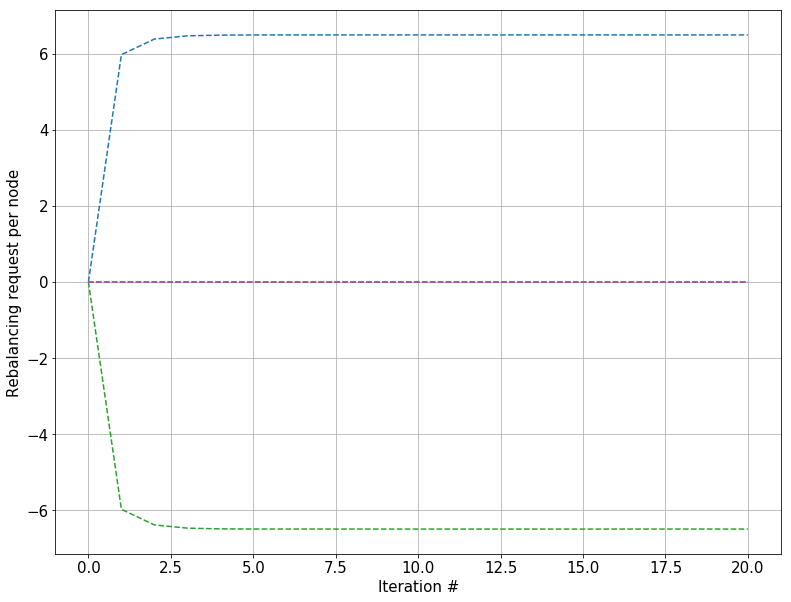

In [17]:
plot_ri_list(ri_FW2, save = False, path = None)

Here we have the dip because there is only one single rebalancing path, so of course it is perfectly rebalanced. 

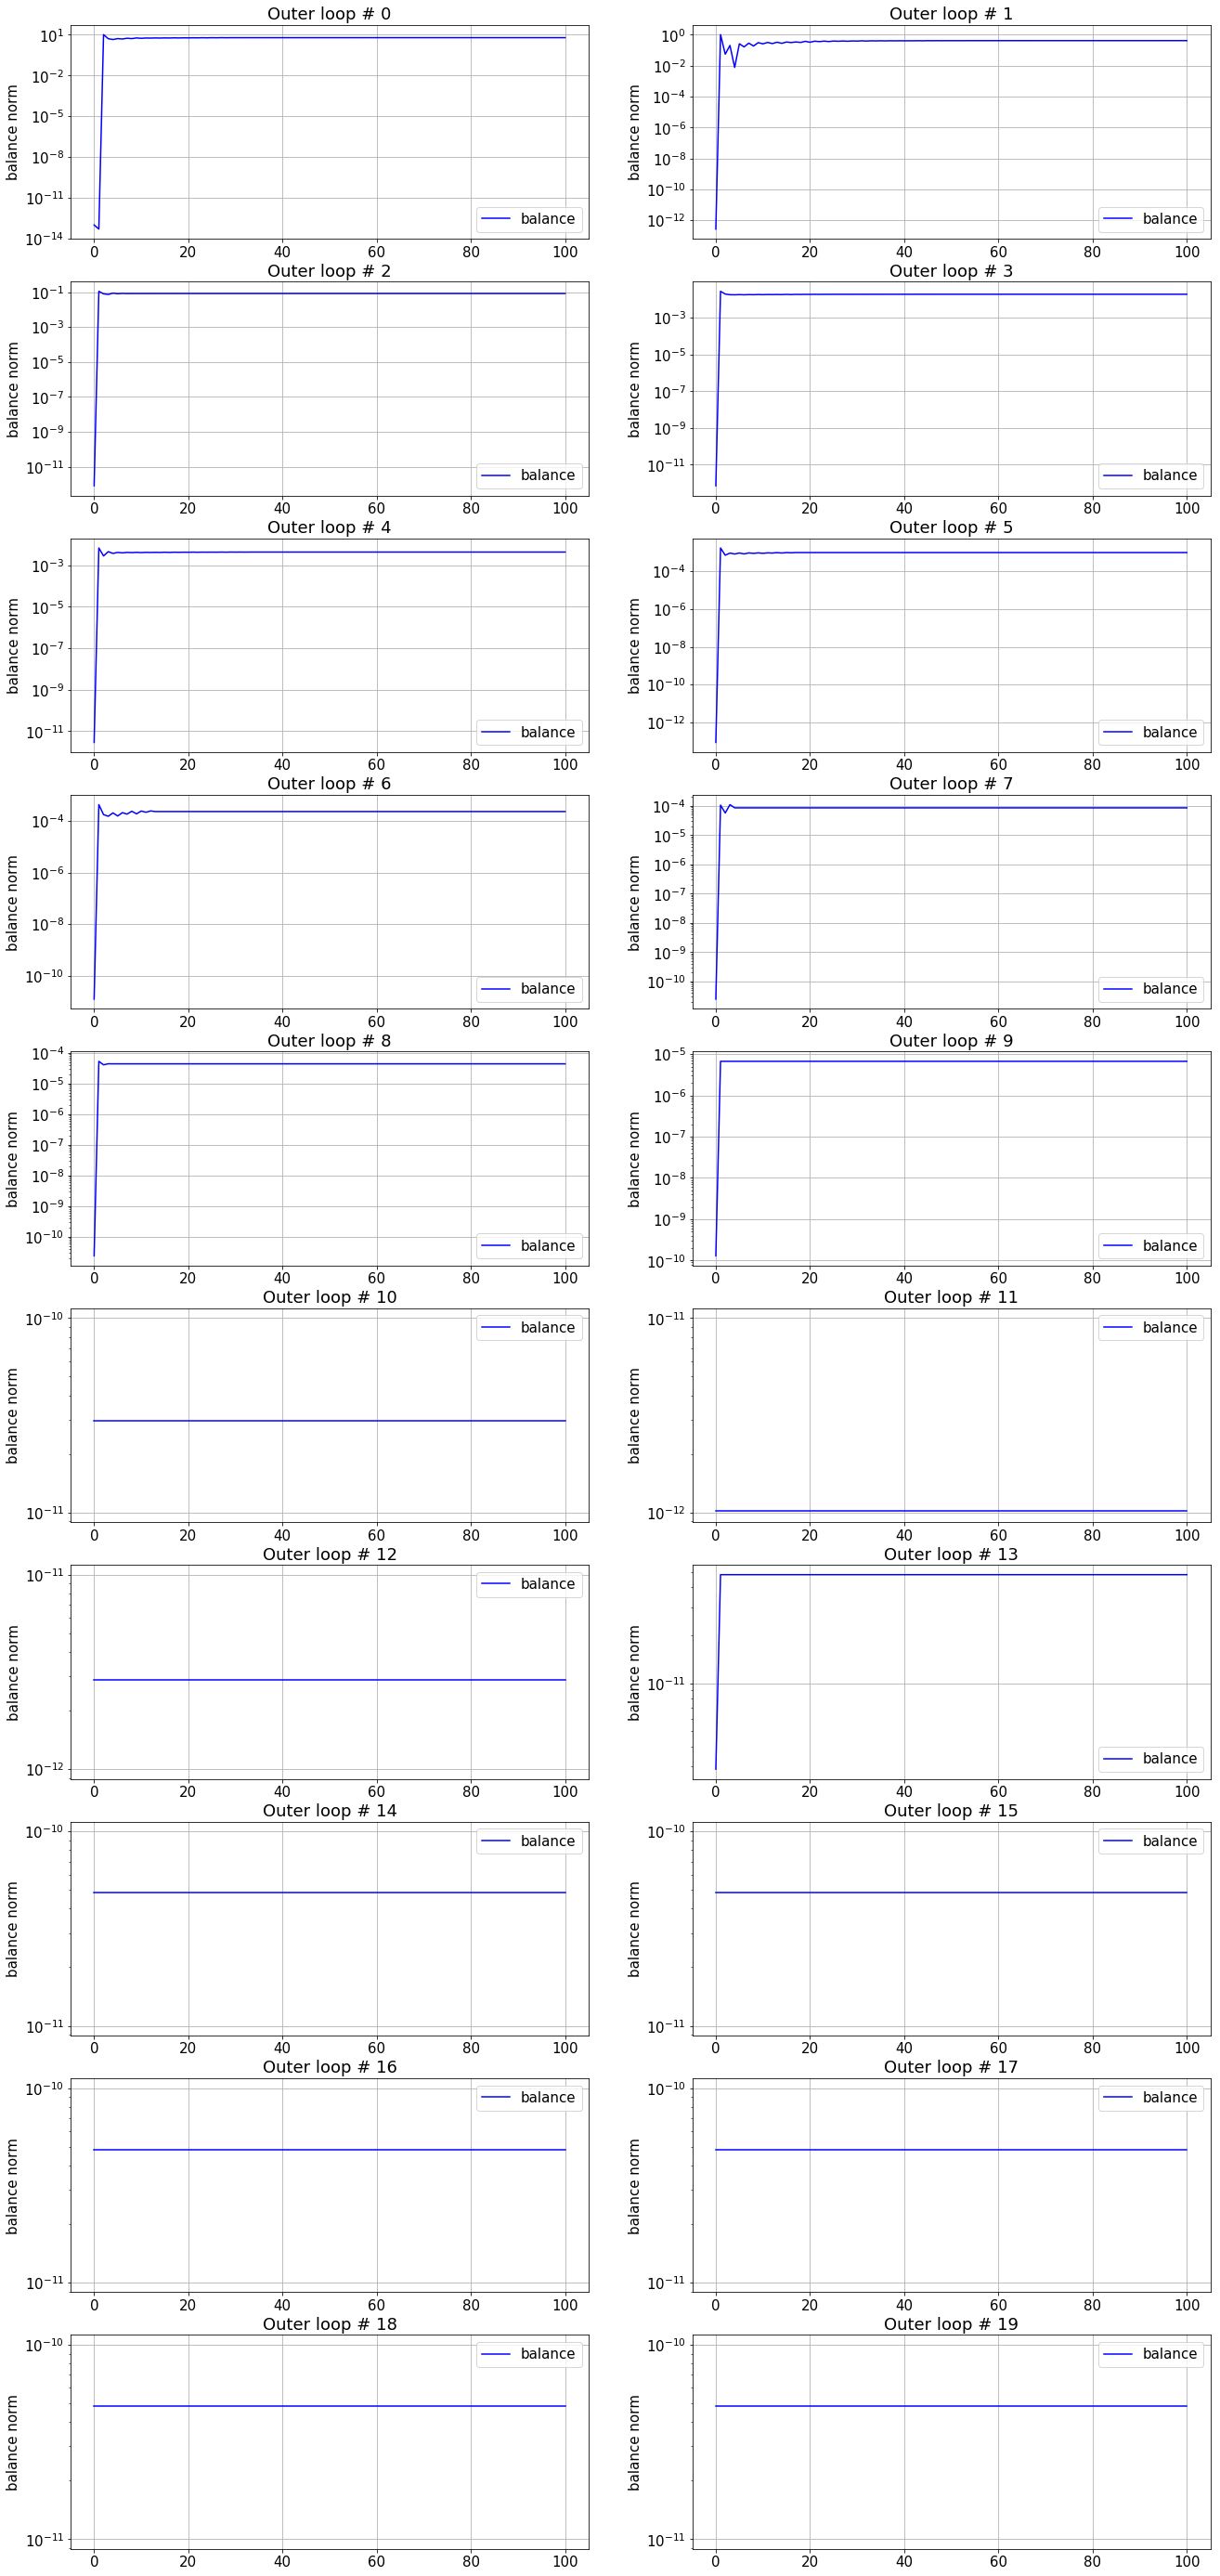

In [18]:
plot_balance_list(balance_list2, b_scale='log')

I believe the problem we solve is the right one. How can we explain that we do not see any improvement in the balance, though? 

No handles with labels found to put in legend.


Text(0, 0.5, 'Balance Norm')

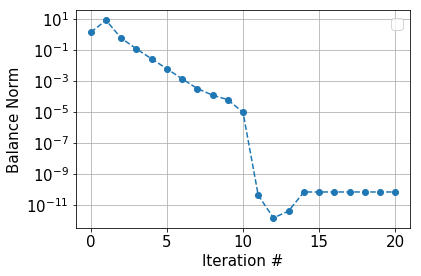

In [19]:
b=np.linalg.norm(balance2, axis=1)
plt.plot(np.array(b), 'o--')
plt.grid(True)
plt.legend()
plt.yscale('log')
plt.xticks(np.arange(0, 21, step=5))
plt.xlabel('Iteration #')
plt.ylabel('Balance Norm')

In [20]:
G_ref = G_FW2[2][0]

In [21]:
for e in G_ref.edges():
    if '0' in e:
        print(e, G_ref[e[0]][e[1]]['f_m'], G_ref[e[0]][e[1]]['f_r'])

('0', '1') 9.276492367965611 1.723465240865609e-09
('0', 'R') 0.0 5.973293152703055
('0', '1_p') 3.3031992152638385 0
('0', '0_p') 0.7235076320343891 0
('1', '0') 3.3031992152638385 5.973293154424969


## New Init with step

Here we keep the step size starting from iteration 10

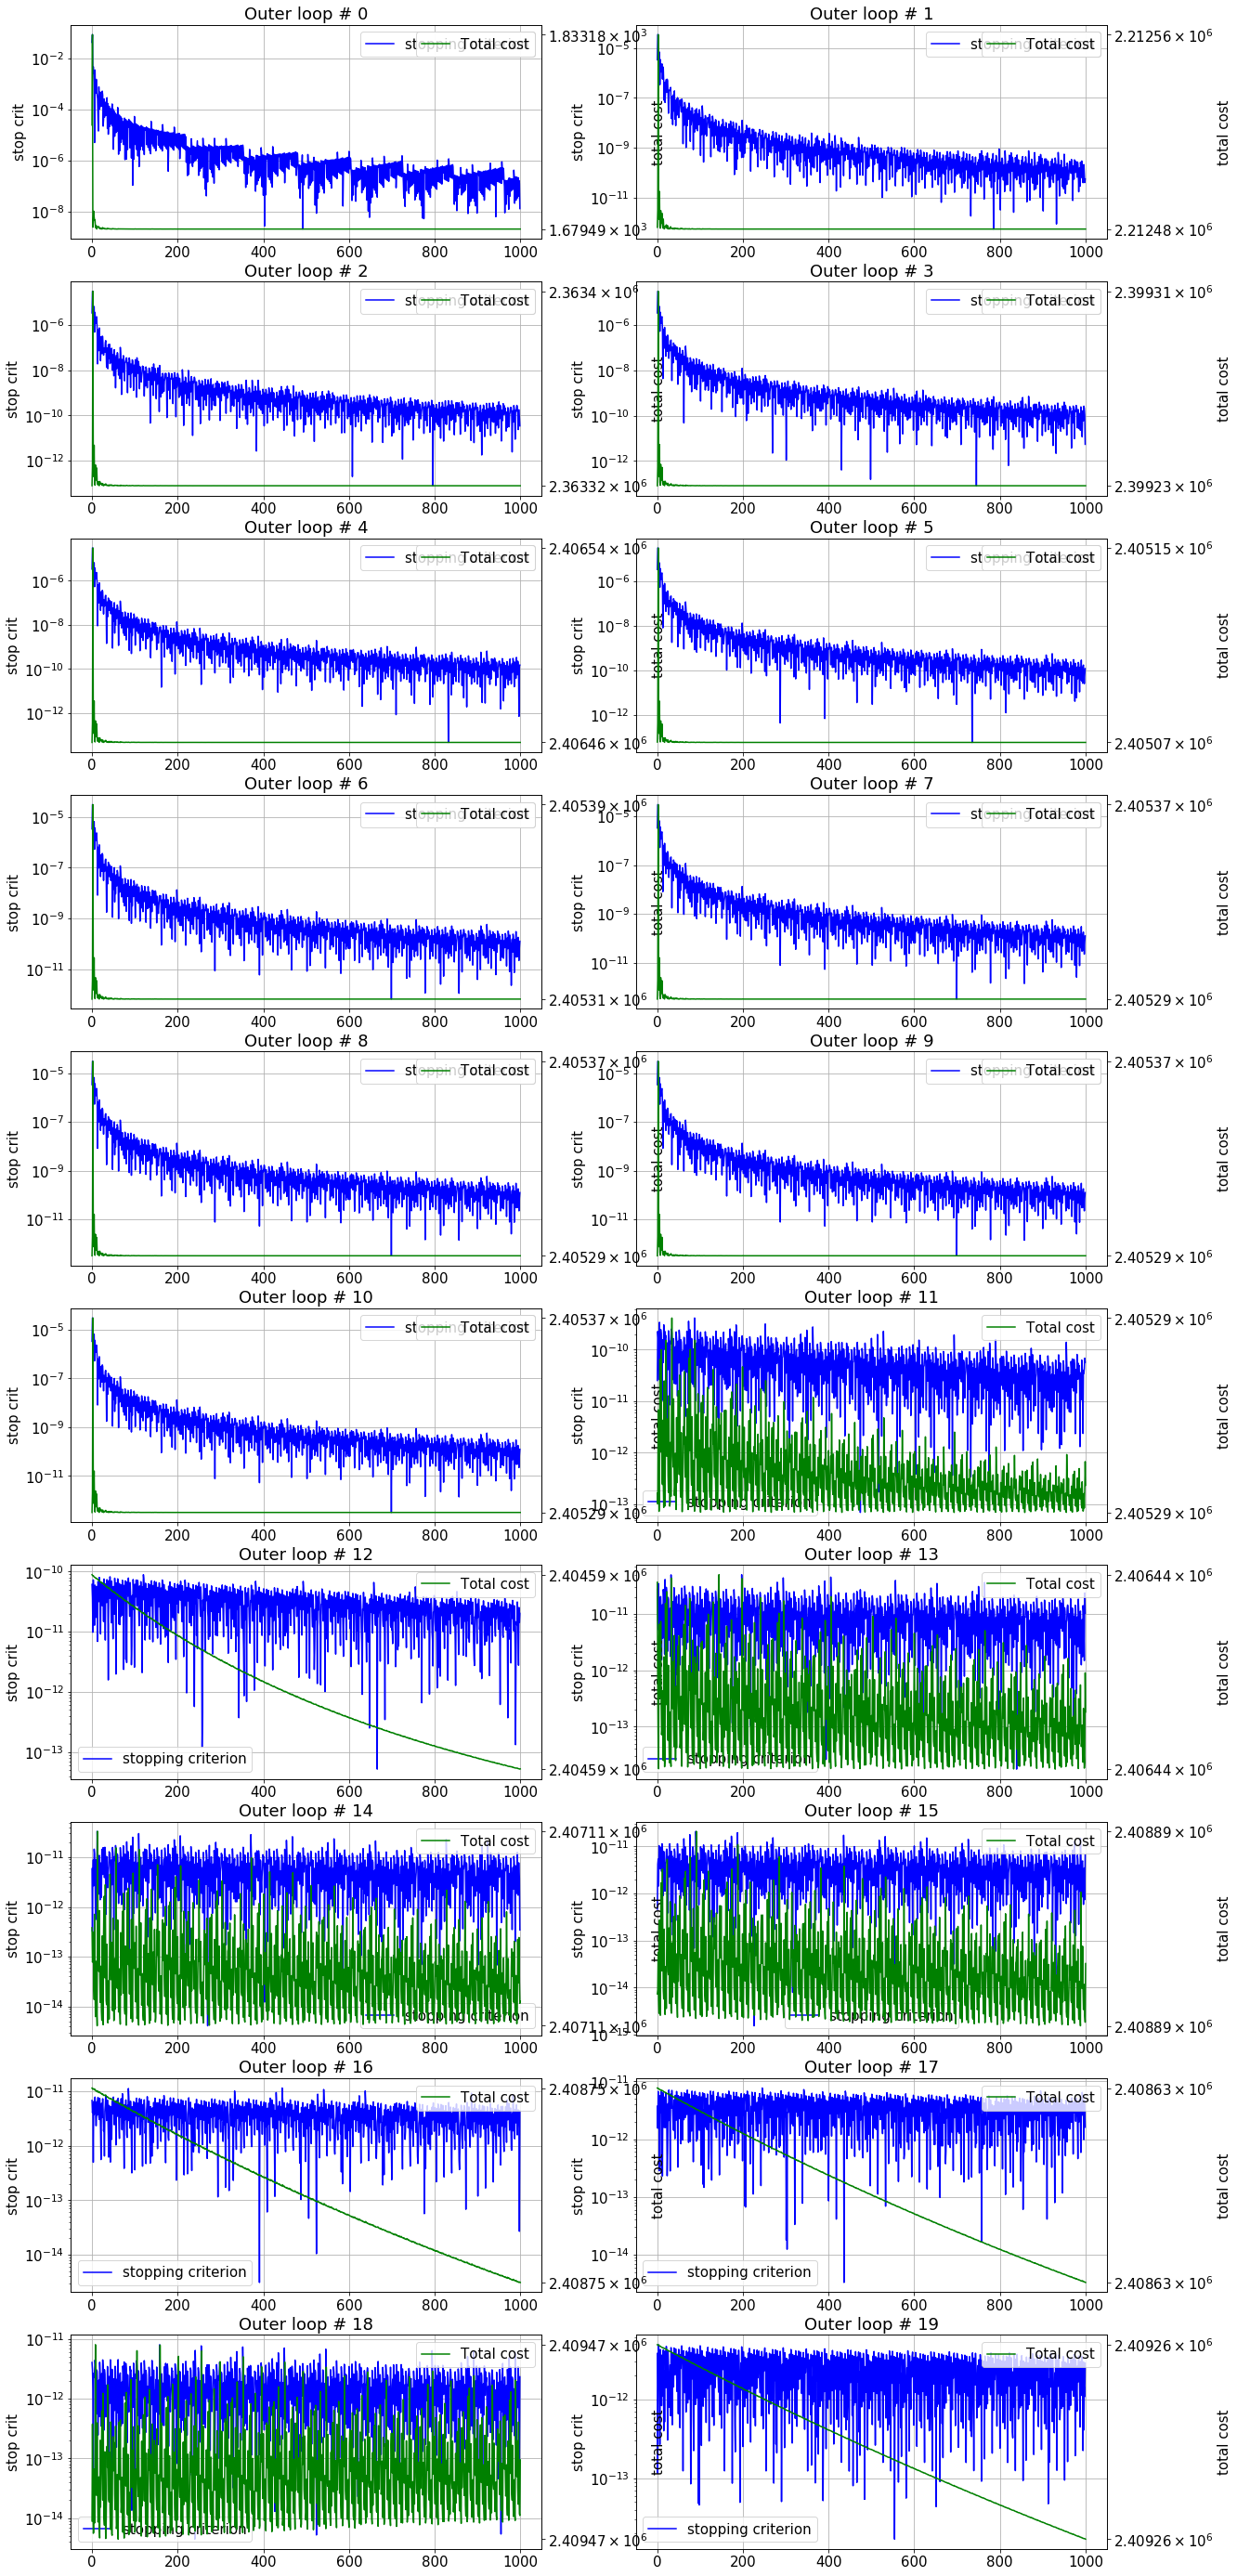

In [72]:
plot_stop_and_cost(opt_res3)

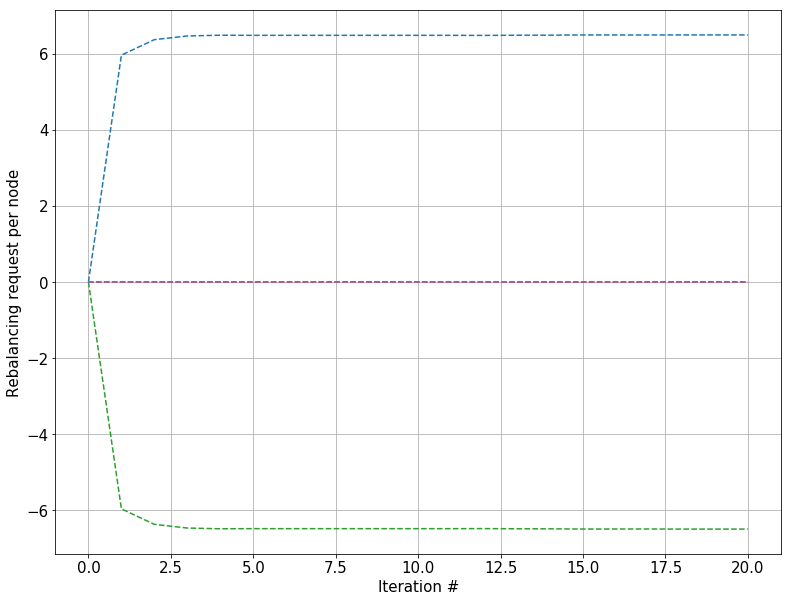

In [73]:
plot_ri_list(ri_FW3, save = False, path = None)

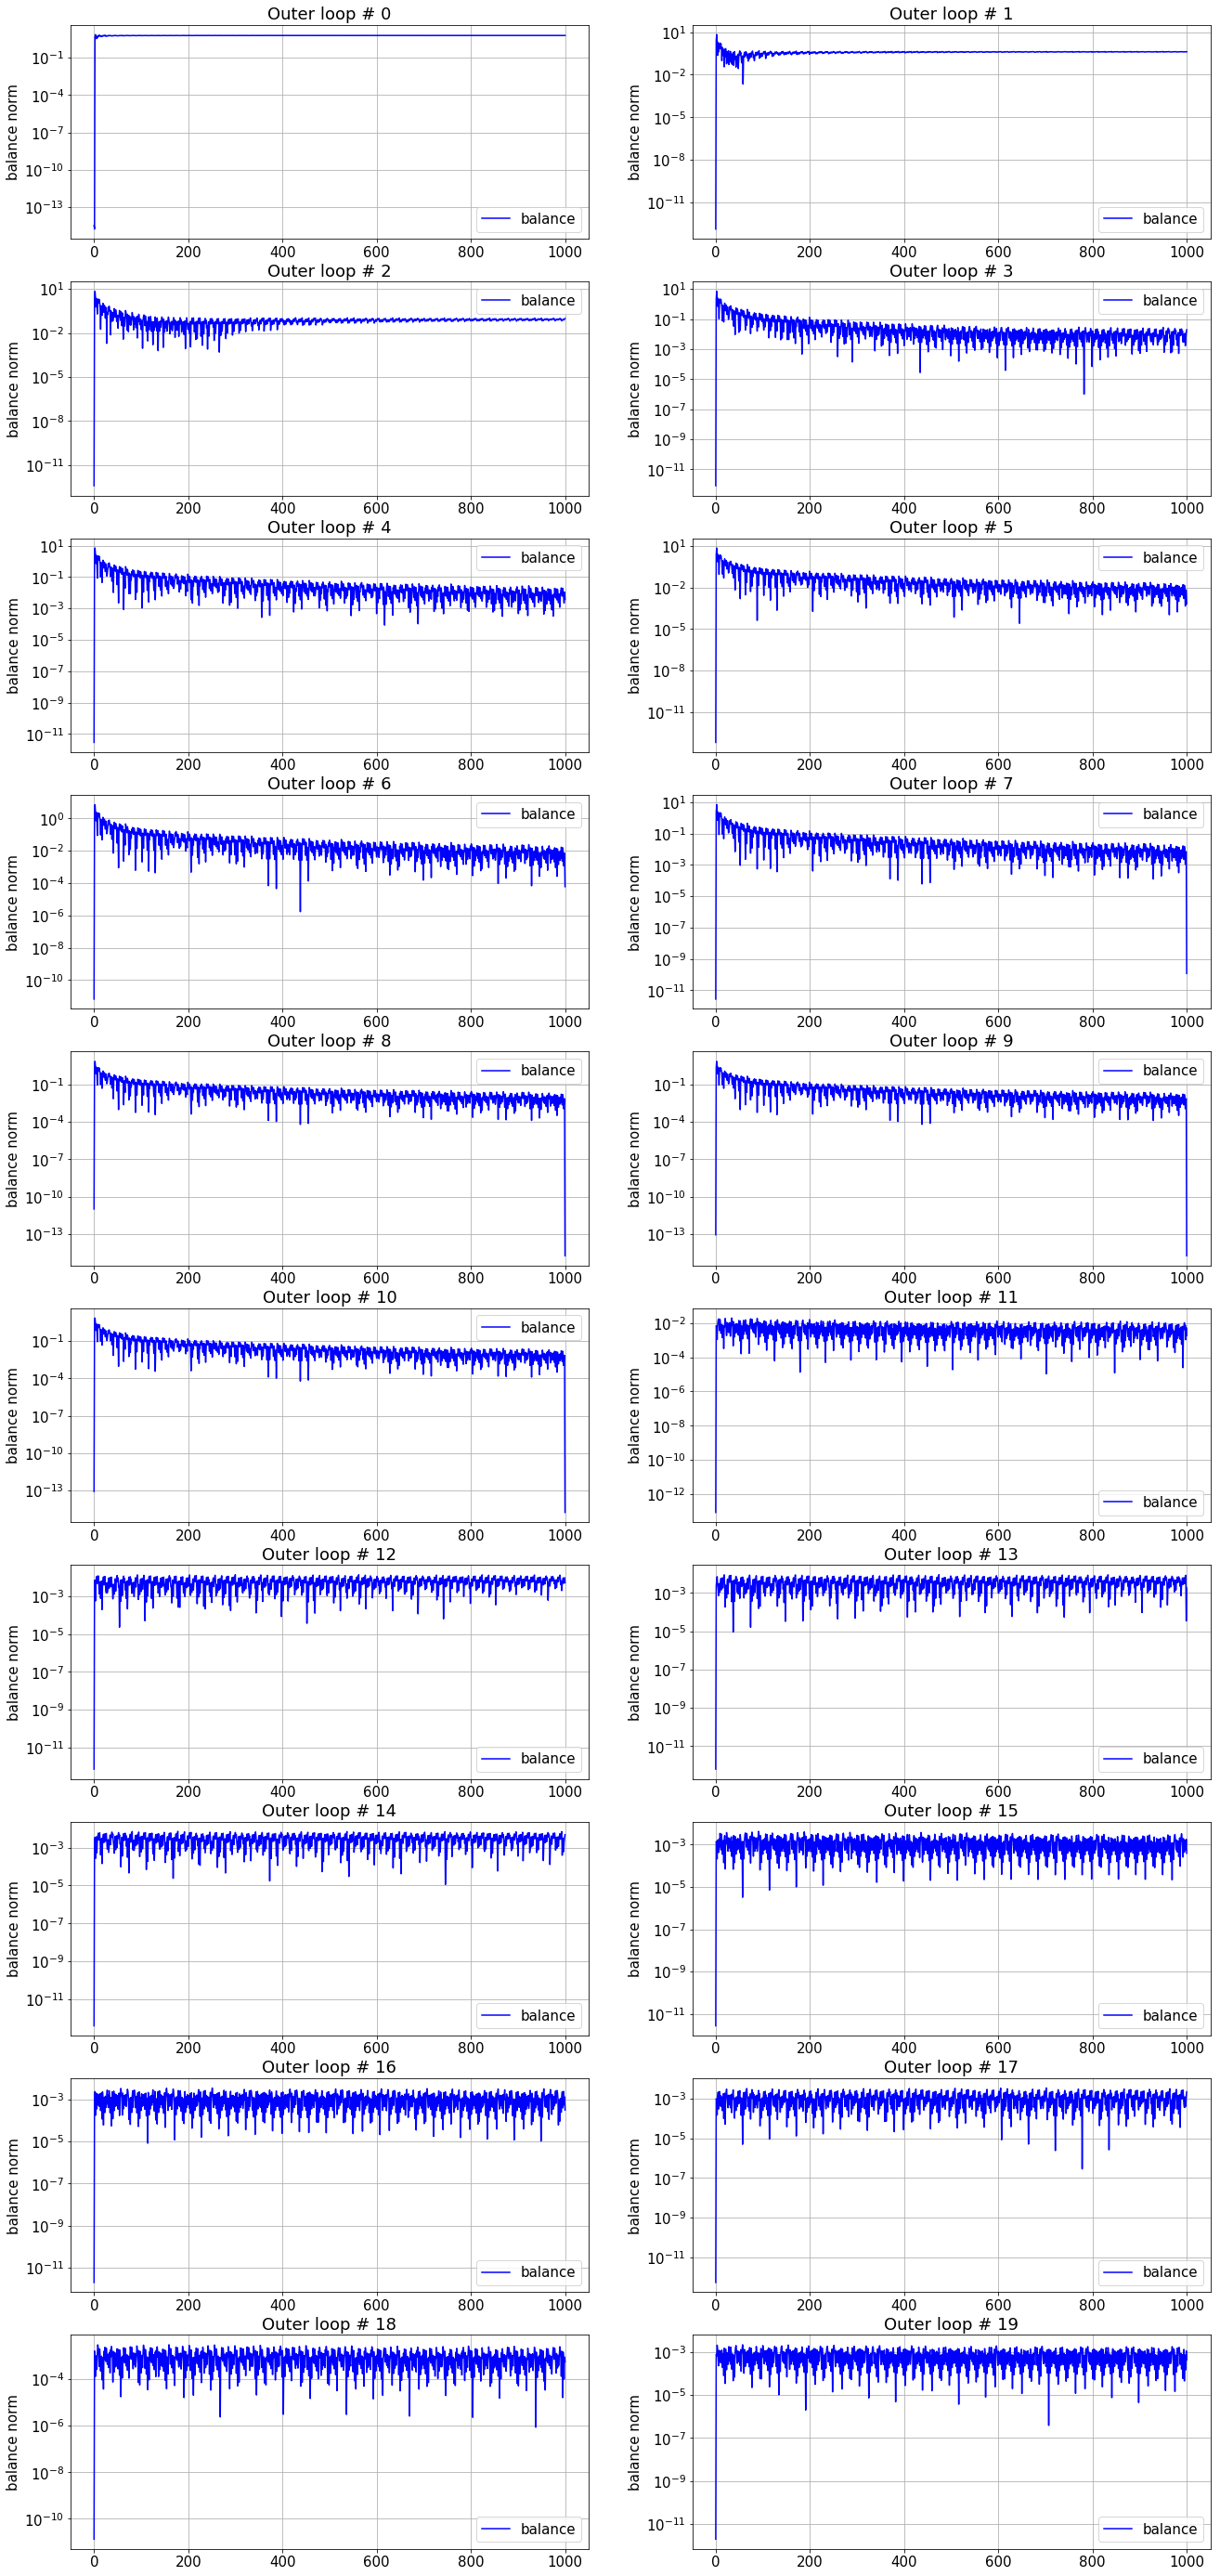

In [74]:
plot_balance_list(balance_list3, b_scale='log')

I believe the problem we solve is the right one. How can we explain that we do not see any improvement in the balance, though? 

No handles with labels found to put in legend.


Text(0, 0.5, 'Balance Norm')

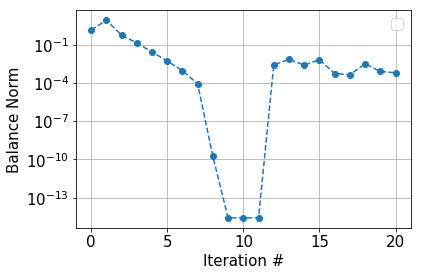

In [75]:
b=np.linalg.norm(balance3, axis=1)
plt.plot(np.array(b), 'o--')
plt.grid(True)
plt.legend()
plt.yscale('log')
plt.xticks(np.arange(0, 21, step=5))
plt.xlabel('Iteration #')
plt.ylabel('Balance Norm')

#  New init with 10 Nodes

Here we do not carry over the step size. It is essentially to investigate why we have such a big drop in balance at the very first iteration. 

In [34]:
n_nodes=10

In [35]:
path='Data/'+str(n_nodes)+'Nodes/outputs/'+subfolder

In [36]:
print(os.listdir(path))

['new_init.pkl', 'initial_setup.pkl']


In [61]:

with open(os.path.join(path, 'new_init.pkl'), 'rb') as f:
        G_FW, OD, ri_FW, n_outer, n_inner, balance, opt_res, OD_list, balance_list, params = pickle.load(f)

In [62]:
print_final_flows(G_FW[-1])

('0', '1')  :  8.925538793212705e-05
('0', '2')  :  7.277324571948519
('0', '3')  :  10.741688172584391
('0', '7')  :  6.6318202217228075
('0', 'R')  :  5.6767146722023725
('0', '0_p')  :  6.090944461903715
('1', '0')  :  10.74177742775133
('1', '4')  :  1.7881590328429345e-10
('2', '0')  :  8.925538793212705e-05
('2', '6')  :  7.277235316751085
('3', '0')  :  10.74168817258679
('3', '9')  :  5.064973500326681
('3', '5_p')  :  5.6767146722014425
('4', '1')  :  12.799323377006525
('4', '5')  :  2.0576352046418265
('4', '8')  :  2.0576352046418265
('4', '5_p')  :  6.1729056133896245
('5', '4')  :  16.914593785931846
('5', 'R')  :  6.172905613390369
('5', '5_p')  :  13.085406214246978
('6', '2')  :  7.2772353167518595
('6', '0_p')  :  7.277235316560587
('7', '0')  :  6.631820221723566
('7', '0_p')  :  6.631820221535702
('8', '4')  :  1.7881590328429554e-10
('9', '3')  :  5.064973500328208
('9', '5_p')  :  5.064973500161956


In [63]:
from amod_ed.result_analysis import print_final_cost

In [70]:
G_ref = G_FW[-1][-1]

In [72]:
print(G_ref['5']['R']['k'])
print(G_ref['5']['R']['f_m']+G_ref['5']['R']['f_r'])

16.91459378575303
6.172905613390369


In [73]:
print(G_ref['0']['R']['k'])
print(G_ref['0']['R']['f_m']+G_ref['0']['R']['f_r'])

13.909055538096288
5.6767146722023725


In [77]:
tot_R = 0
for e in OD_list[-1][-1]:
    if e[1] =='R':
        tot_R +=OD_list[-1][-1][e]

In [78]:
tot_R

30.82364932384932

Something is missing. Why? There should always be a fixed total amount of rebalancers across the network. This total amount should be equal to to 30.82 for example in this case. however, we see that only 11 have been allocated. 

Currently, I write that the rebalancing flows should be defined at the edges of the excess nodes, but I do not write continuity for the flows at other nodes I think. We should check that. 

In [81]:
G = G_FW[1][-1]
for e in G.edges():
    print(e,G[e[0]][e[1]]['f_r'])

('0', '1') 7.986661348926117e-13
('0', '2') 7.986661348926117e-13
('0', '3') 7.986661348926117e-13
('0', '7') 7.986661348926117e-13
('0', 'R') 0
('0', '0_p') 0.0
('1', '0') 7.986661348926117e-13
('1', '4') 7.986661348926117e-13
('2', '0') 7.986661348926117e-13
('2', '6') 7.986661348926117e-13
('3', '0') 7.986661348926117e-13
('3', '9') 7.986661348926117e-13
('3', '5_p') 0.0
('4', '1') 7.986661348926117e-13
('4', '5') 7.986661348926117e-13
('4', '8') 7.986661348926117e-13
('4', '5_p') 0.0
('5', '4') 7.986661348926117e-13
('5', 'R') 0
('5', '5_p') 0.0
('6', '2') 7.986661348926117e-13
('6', '0_p') 0.0
('7', '0') 7.986661348926117e-13
('7', '0_p') 0.0
('8', '4') 7.986661348926117e-13
('9', '3') 7.944522166839165e-13
('9', '5_p') 0.0


In [80]:
G = G_FW[2][0]
for e in G.edges():
    print(e,G[e[0]][e[1]]['f_r'])

('0', '1') 8.927198846467061e-05
('0', '2') 8.927198846467061e-05
('0', '3') 7.534928861007803e-10
('0', '7') 1.7578395637335427e-09
('0', 'R') 5.676714672201436
('0', '0_p') 0
('1', '0') 8.927198846467061e-05
('1', '4') 7.599574234506011e-09
('2', '0') 8.927198846467061e-05
('2', '6') 1.5248094629402988e-09
('3', '0') 10.741688173116895
('3', '9') 2.5706852260730055e-09
('3', '5_p') 0
('4', '1') 2.0576352120627774
('4', '5') 2.057635212062778
('4', '8') 2.057635212062778
('4', '5_p') 0
('5', '4') 7.599574234506011e-09
('5', 'R') 6.172905613389592
('5', '5_p') 0
('6', '2') 7.277235318085363
('6', '0_p') 0
('7', '0') 6.631820223293504
('7', '0_p') 0
('8', '4') 7.599574234506011e-09
('9', '3') 5.064973502732634
('9', '5_p') 0


In [64]:
print_final_cost(G_FW[-1])

('0', '1')  :  36.0
('0', '2')  :  37.51453997325004
('0', '3')  :  43.18925557797079
('0', '7')  :  37.04453918894977
('0', 'R')  :  361498.27474282176
('0', '0_p')  :  359.0
('1', '0')  :  43.1894945296865
('1', '4')  :  36.0
('2', '0')  :  36.0
('2', '6')  :  37.51446567227524
('3', '0')  :  43.189255577977214
('3', '9')  :  36.35538776305109
('3', '5_p')  :  149.23042608819304
('4', '1')  :  50.492449867490365
('4', '5')  :  36.00967982012025
('4', '8')  :  36.00967982012025
('4', '5_p')  :  278.79820116889437
('5', '4')  :  80.2018095941684
('5', 'R')  :  360957.8687746456
('5', '5_p')  :  359.0
('6', '2')  :  37.51446567227588
('6', '0_p')  :  283.97107063168664
('7', '0')  :  37.04453918895025
('7', '0_p')  :  321.95545541134493
('8', '4')  :  36.0
('9', '3')  :  36.35538776305152
('9', '5_p')  :  112.87503246973563


In [38]:
params

{'L': 10000,
 'ni': 100,
 'no': 20,
 'ev': False,
 'sc': 'relative_progress',
 'fu': False,
 'ri_smoothing': False,
 'update_factor': False,
 'FW_tol': 0,
 'tol': 0}

/Users/lucasfuentes/anaconda3/lib/python3.6/site-packages/matplotlib/ticker.py:2241: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


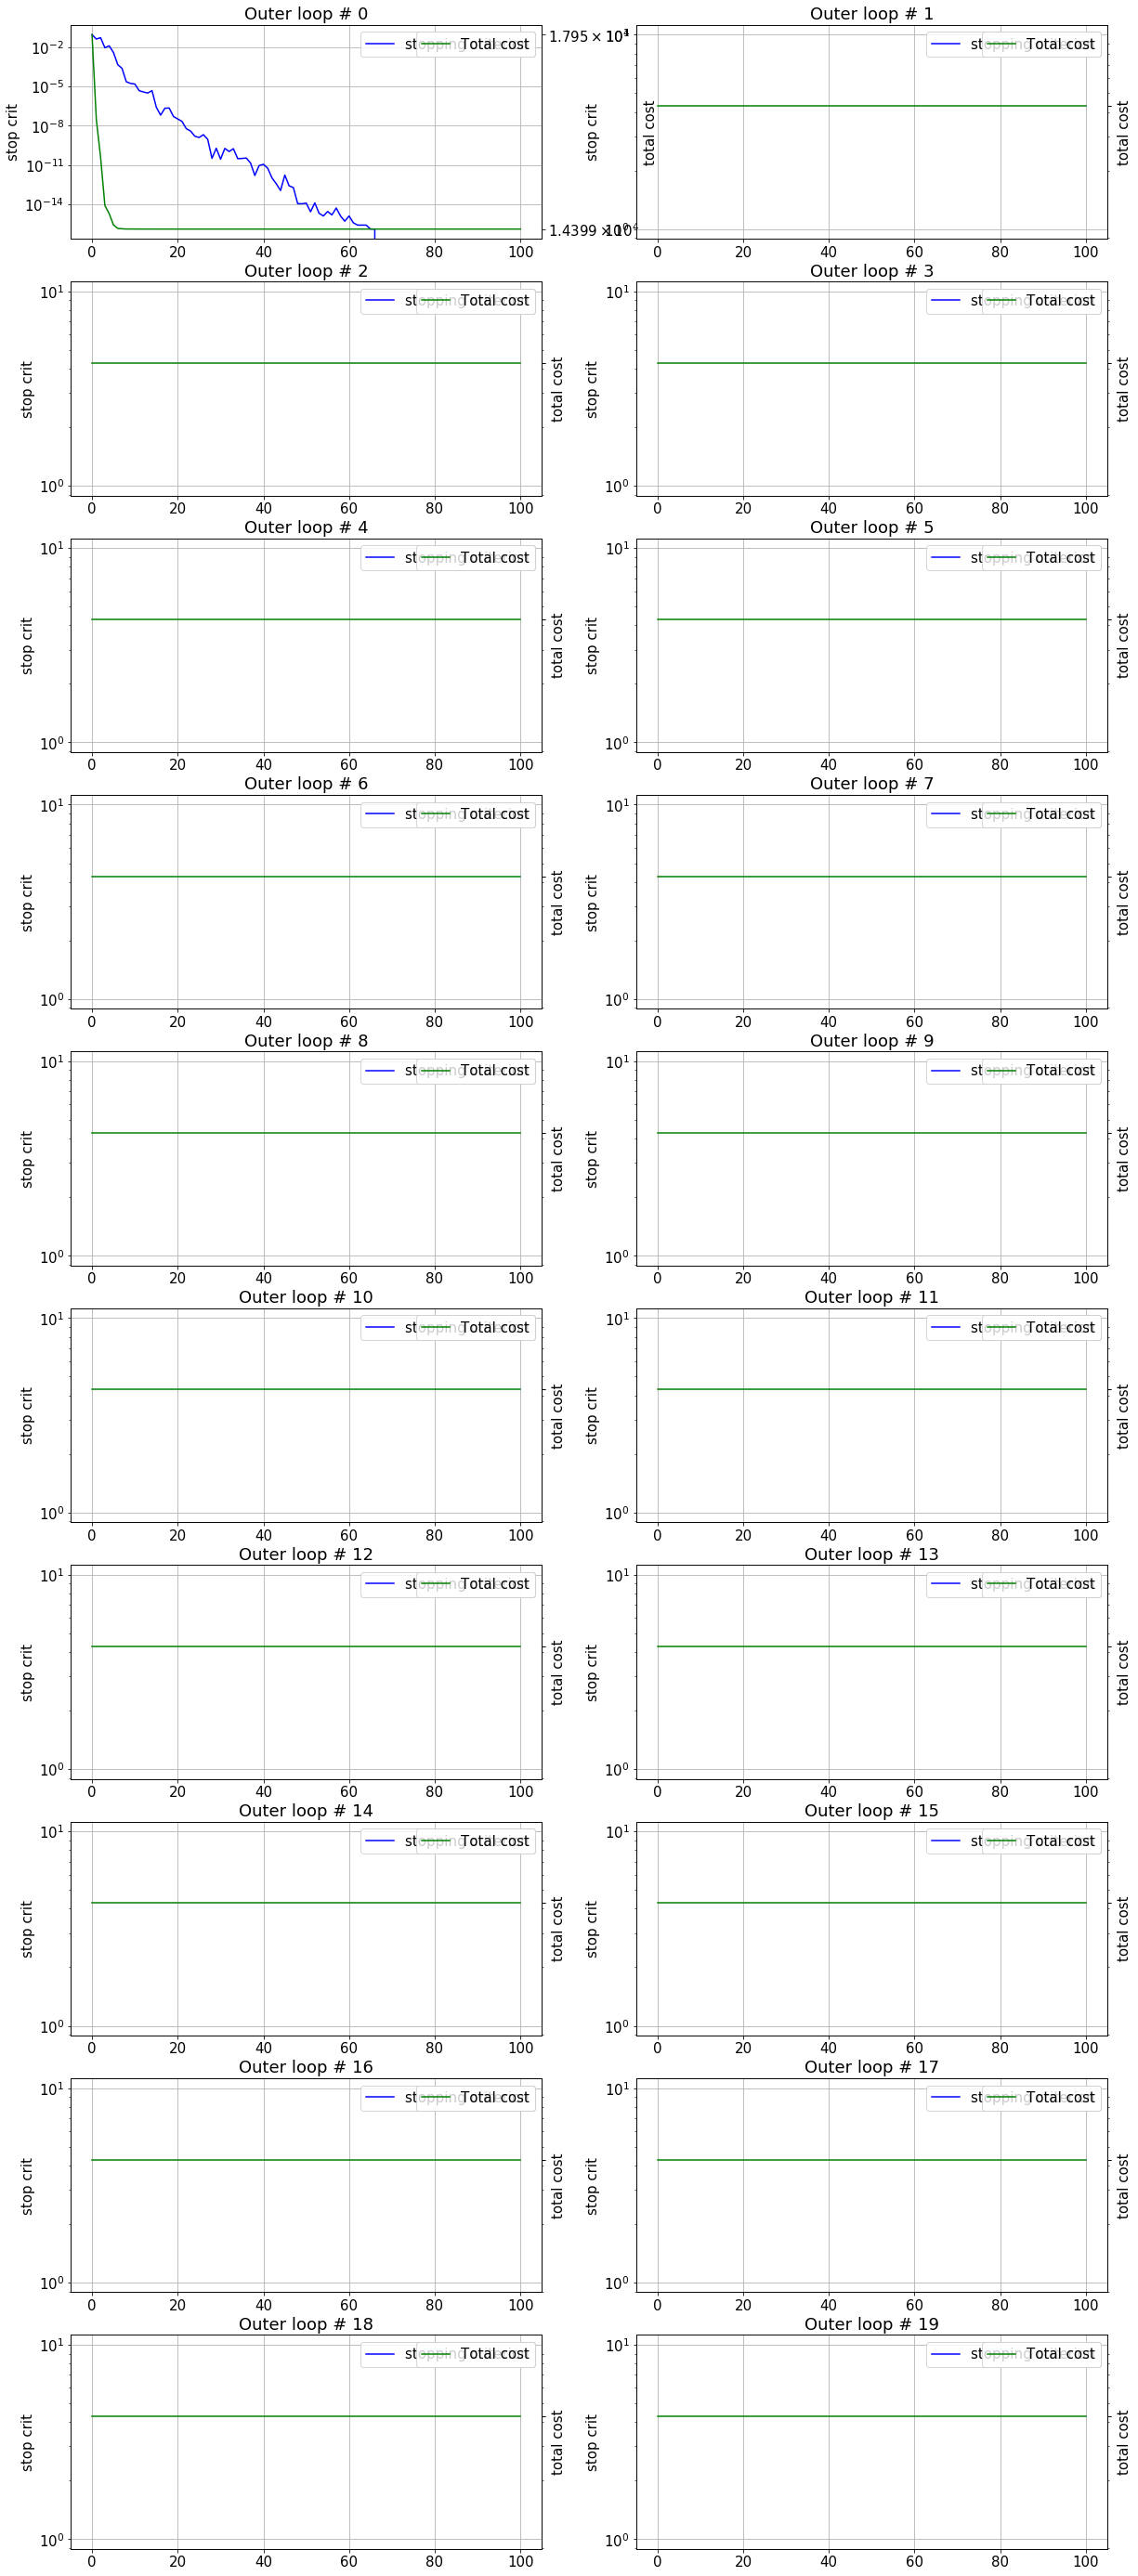

In [65]:
plot_stop_and_cost(opt_res)

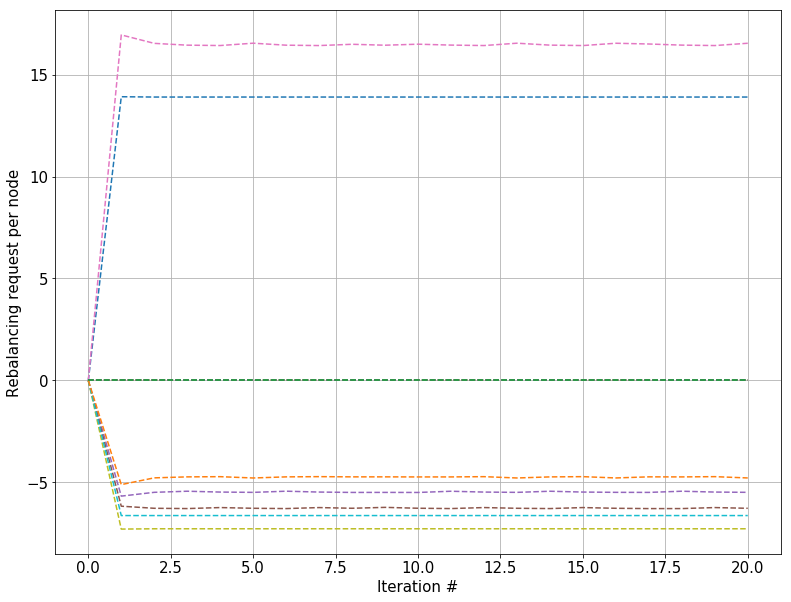

In [58]:
plot_ri_list(ri_FW, save = False, path = None)

In [55]:
ri_FW[-1]

{'0': 13.909055538096288,
 '0_p': 0,
 '1': 0.0,
 '2': 0.0,
 '3': -5.6767146722014425,
 '4': -6.1729056133896325,
 '5': 16.91459378575303,
 '5_p': 0,
 '6': -7.277235316560587,
 '7': -6.631820221535702,
 '8': 0.0,
 '9': -5.064973500161956,
 'R': 0}

No handles with labels found to put in legend.


Text(0, 0.5, 'Balance Norm')

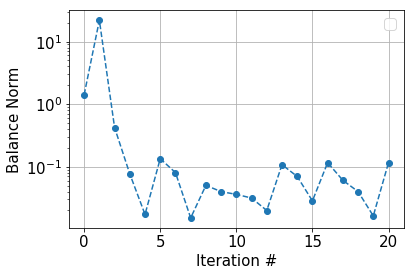

In [59]:
b=np.linalg.norm(balance, axis=1)
plt.plot(np.array(b), 'o--')
plt.grid(True)
plt.legend()
plt.yscale('log')
plt.xticks(np.arange(0, 21, step=5))
plt.xlabel('Iteration #')
plt.ylabel('Balance Norm')

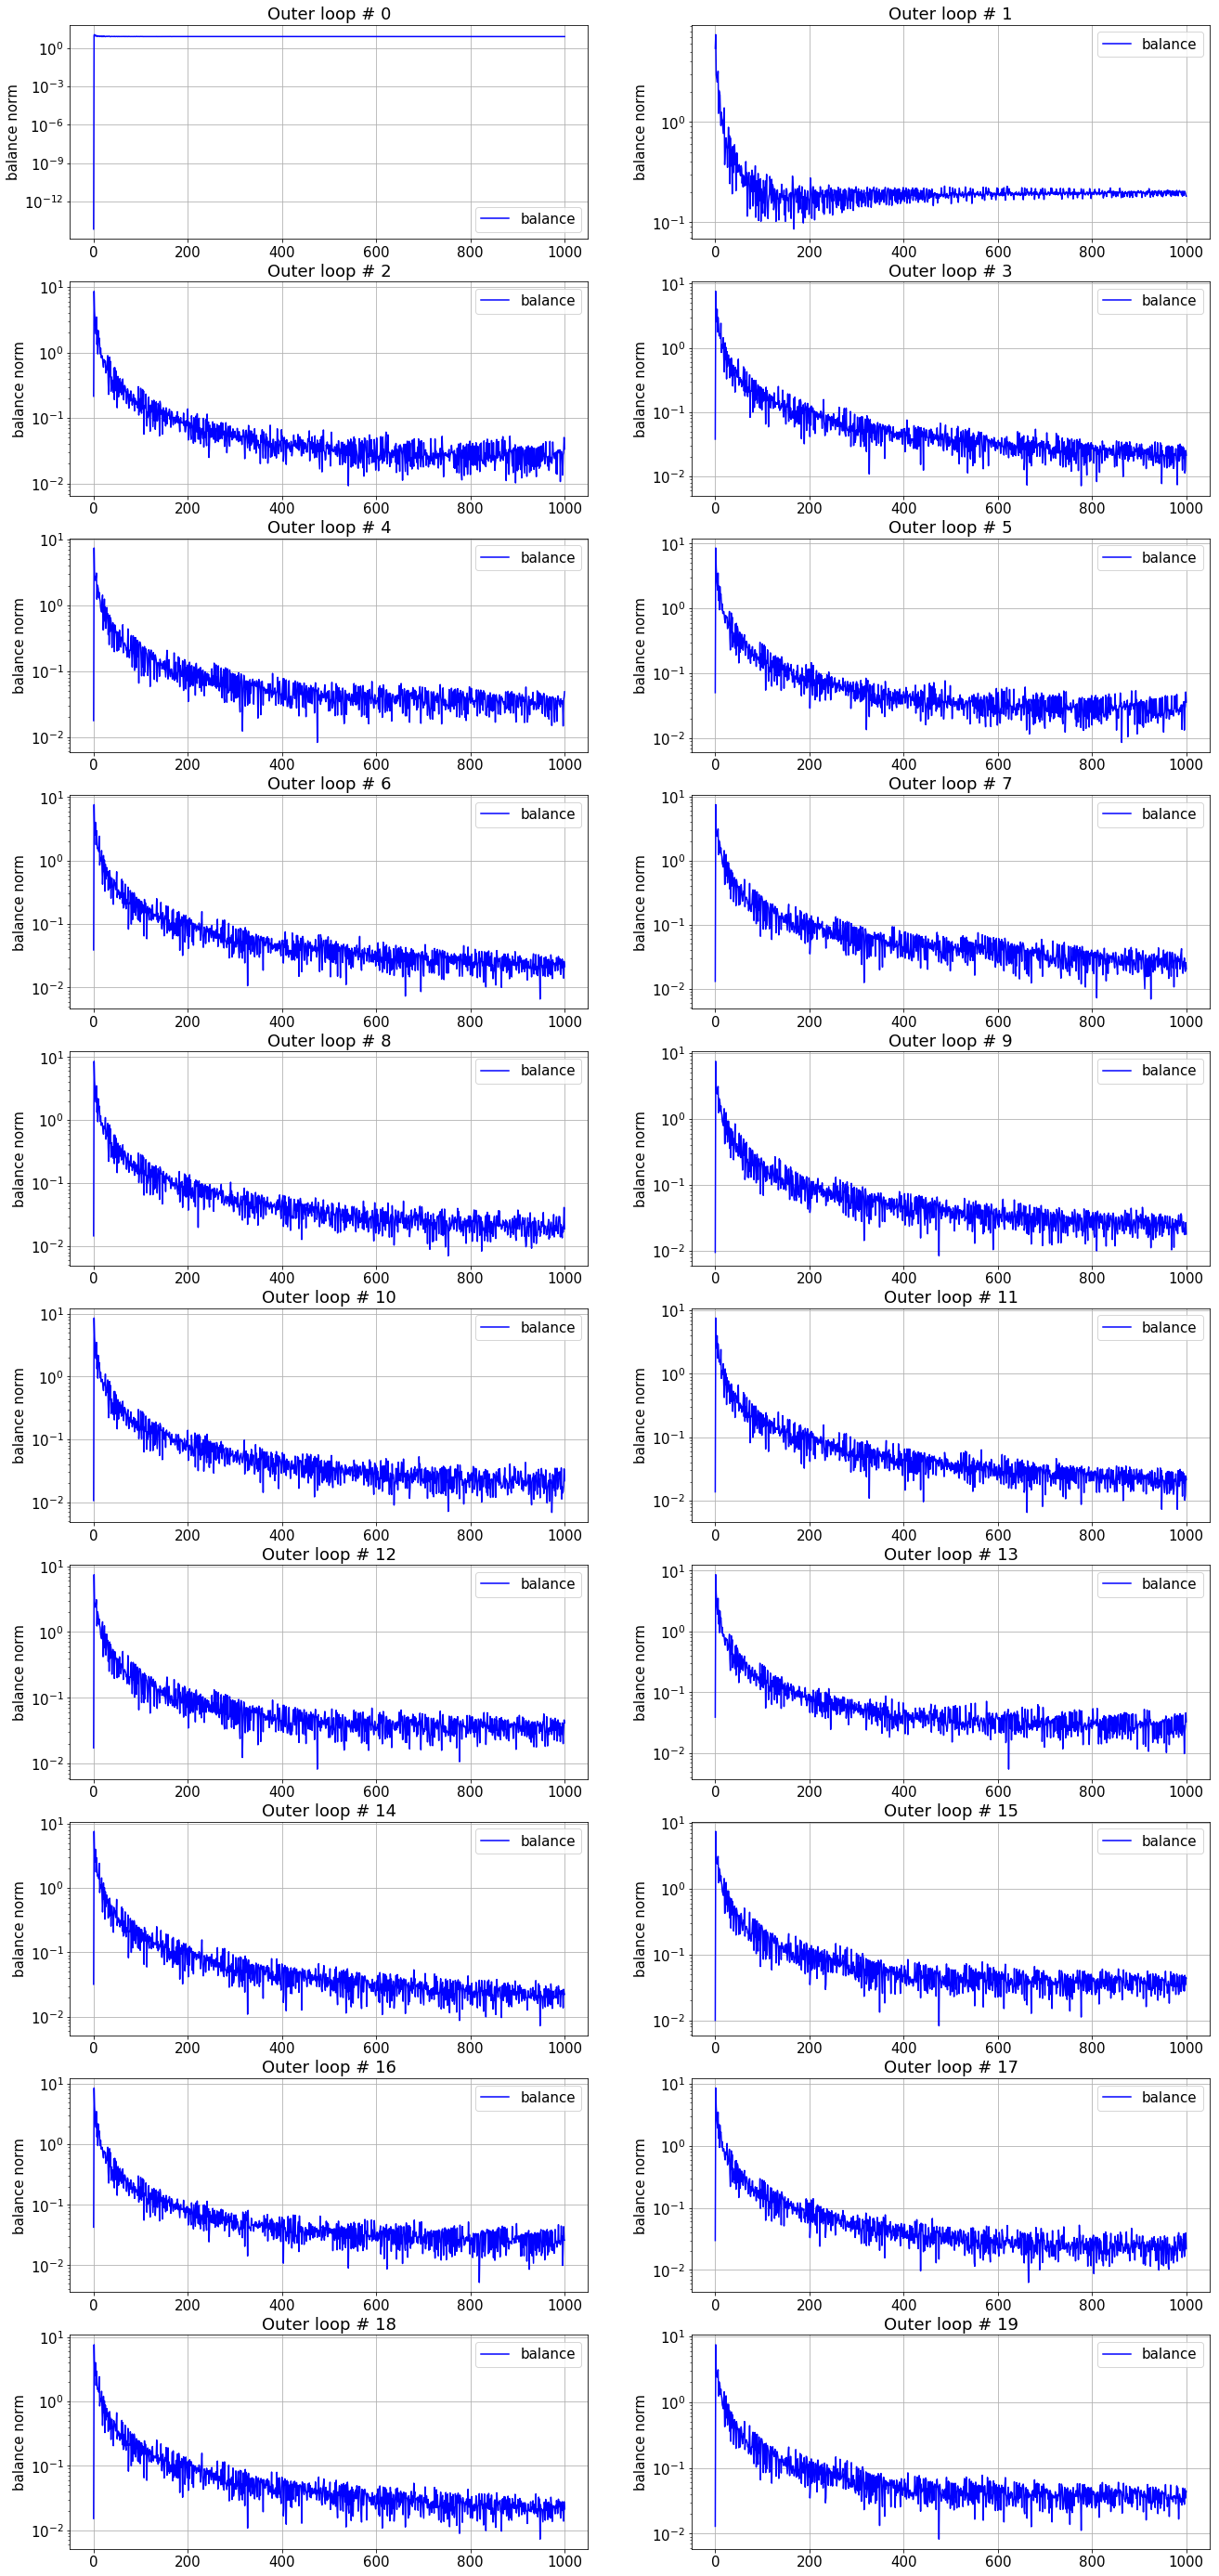

In [60]:
plot_balance_list(balance_list, b_scale='log')

In [122]:
G_ref = G_FW[3][0]

In [123]:
balance_list[1][0]

2.384748110816334e-14

In [124]:
for e in G_ref.edges():
    if '0' in e:
        print(e, G_ref[e[0]][e[1]]['f_m'], G_ref[e[0]][e[1]]['f_r'])

('0', '1') 0.0 12.437685318253061
('0', '2') 7.27290132677817 0.007689954788857333
('0', '3') 10.445085411199639 0.1668583601764322
('0', '7') 6.624646061947259 3.2473803217194815e-05
('0', 'R') 0.0 13.897547388725487
('0', '0_p') 6.1024526112745665 0
('1', '0') 10.445085411199639 1.992599907053202
('2', '0') 0.0 7.2805912815669425
('3', '0') 0.0 10.611943771375966
('7', '0') 0.0 6.624678535750942


In [125]:
for e in G_ref.edges():
    if '5' in e:
        print(e, G_ref[e[0]][e[1]]['f_m'], G_ref[e[0]][e[1]]['f_r'])

('4', '5') 0.0 16.792351355064962
('5', '4') 16.670429260226438 0.1219220948384662
('5', 'R') 0.0 16.670429260226495
('5', '5_p') 13.329570739773573 0


We now see that the flows 0 R and 5 R actually conserve what they need to conserve

# Does the new init give us **exactly** the same assignment if we give **exactly** the same r_i? 

## 2 Nodes

In [22]:
n_nodes=2

In [23]:
path='Data/'+str(n_nodes)+'Nodes_back2basics/outputs/'+subfolder

In [24]:
print(os.listdir(path))

['line_search_notNNinit_longerNI.pkl', 'new_init.pkl', 'initial_setup.pkl', 'line_search_notNNinit.pkl']


In [25]:
with open(os.path.join(path, 'initial_setup.pkl'), 'rb') as f:
        G_FW1, OD, ri_FW1, n_outer, n_inner, balance1, opt_res1, OD_list, balance_list1, params = pickle.load(f)

In [27]:
G = G_FW1[12][0]
for e in G.edges():
    print(e,G[e[0]][e[1]]['f_r'])

('0', '1') 0
('0', 'R') 6.494304099094502
('0', '1_p') 0
('0', '0_p') 0
('1', '0') 6.494304099094502
('1', 'R') 0
('1', '0_p') 0
('1', '1_p') 0


In [28]:
ri_FW1[12]

{'0': 6.494304099094502,
 '0_p': 0.0,
 '1': -6.494304099094502,
 '1_p': 0.0,
 'R': 0.0}

In [29]:
from amod_ed.flows_init import initialize_flows

In [30]:
G_k = initialize_flows(G_FW1[11][-1].copy(),G_FW1[11][-1].copy(), ri_FW1[11], OD)

Initialization problem status:  optimal
obj value:  5.190734136452241e-11


For 2 nodes, we have checked that indeed we reinitialize at **exactly** the same flows for the rebalancers. 

## 10 Nodes

In [31]:
n_nodes=10

In [32]:
path='Data/'+str(n_nodes)+'Nodes/outputs/'+subfolder

In [33]:
print(os.listdir(path))

['output_L_10000_ni_100_no_20_ev_0_relative_progress_fu_False.pkl']


In [39]:
with open(os.path.join(path, 'back_ls_NN_init_ni_100_ri_smoothing.pkl'), 'rb') as f:
        G_FW1, OD, ri_FW1, n_outer, n_inner, balance, opt_res, OD_list, balance_list, params = pickle.load(f)

In [80]:
G = G_FW1[11][-1]
for e in G.edges():
    print(e,G[e[0]][e[1]]['f_r'])

('0', '1') 10.746074776324543
('0', '2') 6.295459985239782e-07
('0', '3') 0.0006523471882348117
('0', '7') 0.0009079930792844082
('0', 'R') 13.914923410662878
('0', '0_p') 0.0
('1', '0') 3.6124809608180894e-10
('1', '4') 10.746074776320388
('2', '0') 7.27727193378442
('2', '6') 6.29542395282475e-07
('3', '0') 10.752587994557837
('3', '9') 0.007395458928920739
('3', '5_p') 0.0
('4', '1') 3.612480195304421e-10
('4', '5') 16.917547029663385
('4', '8') 0.0004798150725173611
('4', '5_p') 0.0
('5', '4') 3.4940240044229217e-10
('5', 'R') 16.91754702931397
('5', '5_p') 0.0
('6', '2') 7.277271933771434
('6', '0_p') 0.0
('7', '0') 6.63269922809743
('7', '0_p') 0.0
('8', '4') 0.0004798150684683971
('9', '3') 5.073032368955284
('9', '5_p') 0.0


In [82]:
G = G_FW1[12][0]
for e in G.edges():
    print(e,G[e[0]][e[1]]['f_r'])

('0', '1') 10.751935647459858
('0', '2') 1.1887452473274323e-06
('0', '3') 0.0006523400785247307
('0', '7') 0.0009080331700790869
('0', 'R') 13.90906253923077
('0', '0_p') 0
('1', '0') 7.244717118440792e-11
('1', '4') 10.751935647457358
('2', '0') 7.277272492971003
('2', '6') 1.188740927889147e-06
('3', '0') 10.752587987451175
('3', '9') 0.007395477309333176
('3', '5_p') 0
('4', '1') 7.244712418812173e-11
('4', '5') 16.923407900815544
('4', '8') 0.00047970893198158004
('4', '5_p') 0
('5', '4') 7.264228604872767e-11
('5', 'R') 16.923407900742898
('5', '5_p') 0
('6', '2') 7.2772724929609405
('6', '0_p') 0
('7', '0') 6.632699268189852
('7', '0_p') 0
('8', '4') 0.000479708929499533
('9', '3') 5.073032387337215
('9', '5_p') 0


The r_i have been kept fixed. 

In [100]:
ri_FW1[11]

{'0': 13.909062539228247,
 '0_p': 0,
 '1': 0.0,
 '2': 0.0,
 '3': -5.686298737347201,
 '4': -6.171472253362955,
 '5': 16.92340790074046,
 '5_p': 0,
 '6': -7.277271304206007,
 '7': -6.63179123502224,
 '8': 0.0,
 '9': -5.065636910030305,
 'R': 0}

In [84]:
G_k = initialize_flows(G_FW1[13][-1].copy(),G_FW1[13][-1].copy(), ri_FW1[13], OD)

Initialization problem status:  optimal
obj value:  0.01314465188839221
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'R']
[('0', '1'), ('0', '2'), ('0', '3'), ('0', '7'), ('0', 'R'), ('1', '0'), ('1', '4'), ('2', '0'), ('2', '6'), ('3', '0'), ('3', '9'), ('4', '1'), ('4', '5'), ('4', '8'), ('5', '4'), ('5', 'R'), ('6', '2'), ('7', '0'), ('8', '4'), ('9', '3')]
[[-1. -1. -1. -1.  0.  1.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.
   0.  0.]
 [ 1.  0.  0.  0.  0. -1. -1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0. -1. -1.  0.  0.  0.  0.  0.  0.  0.  1.  0.
   0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0. -1. -1.  0.  0.  0.  0.  0.  0.  0.
   0.  1.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0. -1. -1. -1.  1.  0.  0.  0.
   1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0. -1.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0. -1.  0.
   0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0

In [93]:
t = 0
for e in G_FW1[13][-1].edges():
    print(e, G_FW1[13][-1][e[0]][e[1]]['f_r'])
    if e[0]=='0' and e[1]!='R' and e[1]:
        t += G_FW1[13][-1][e[0]][e[1]]['f_r']
    elif e[1] =='0':
        t -= G_FW1[13][-1][e[0]][e[1]]['f_r']

('0', '1') 10.746057180401912
('0', '2') 1.5473666398072211e-06
('0', '3') 0.0006490182816849748
('0', '7') 0.0009034583921835566
('0', 'R') 13.914941006265833
('0', '0_p') 0.0
('1', '0') 5.148646070860035e-11
('1', '4') 10.746057180399792
('2', '0') 7.277272851589402
('2', '6') 1.547362622787504e-06
('3', '0') 10.752584665655034
('3', '9') 0.007357918452030002
('3', '5_p') 0.0
('4', '1') 5.148641739709445e-11
('4', '5') 16.917529433758652
('4', '8') 0.00047716581598547595
('4', '5_p') 0.0
('5', '4') 5.1599136957686876e-11
('5', 'R') 16.917529433707063
('5', '5_p') 0.0
('6', '2') 7.277272851580506
('6', '0_p') 0.0
('7', '0') 6.6326946934123265
('7', '0_p') 0.0
('8', '4') 0.0004771658138790906
('9', '3') 5.072994828480279
('9', '5_p') 0.0


In [94]:
t

-13.914941006265828

In [101]:
G_FW1[13][-1].nodes['0']['ri']

13.909062539228247

We don't have good correspondence in the history. But if I do it locally it works... why? 

In [113]:
t_tot = []
G_r = []
for i in range(len(G_FW1[13])):
    t = 0
    for e in G_FW1[13][i].edges():
        if e[0]=='0' and e[1]!='R' and e[1]:
            t += G_FW1[13][i][e[0]][e[1]]['f_r']
        elif e[1] =='0':
            t -= G_FW1[13][i][e[0]][e[1]]['f_r']
    t_tot.append(t)
    G_r.append(G_FW1[13][i]['0']['R']['f_r'])

In [108]:
t_tot[0]

-13.909062539230382

In [114]:
G_r[0]

13.909062539230378

In [115]:
t_tot[1]

-13.91956247638602

In [116]:
G_r[1]

13.919562476386018

In [109]:
t_tot[-1]

-13.914941006265828

In [105]:
t

-13.909062539230382

We see this degrades over the course of the iteration as if we were going out of the feasible set...? 

In [87]:
t = 0
for e in G_k.edges():
    print(e, G_k[e[0]][e[1]]['f_r'])
    if e[0]=='0' and e[1]!='R' and e[1]:
        t += G_k[e[0]][e[1]]['f_r']
    elif e[1] =='0':
        t -= G_k[e[0]][e[1]]['f_r']

('0', '1') 10.751935647423508
('0', '2') 1.8129159119299927e-06
('0', '3') 0.0006490104992780771
('0', '7') 0.0009034974744545066
('0', 'R') 13.909062539230112
('0', '0_p') 0
('1', '0') 3.8576448205080513e-11
('1', '4') 10.751935647421634
('2', '0') 7.277273117136727
('2', '6') 1.812912174794365e-06
('3', '0') 10.752584657873127
('3', '9') 0.007357934755639595
('3', '5_p') 0
('4', '1') 3.8576407325821265e-11
('4', '5') 16.92340790078092
('4', '8') 0.0004770560896244037
('4', '5_p') 0
('5', '4') 3.8630246903113085e-11
('5', 'R') 16.923407900742298
('5', '5_p') 0
('6', '2') 7.277273117128681
('6', '0_p') 0
('7', '0') 6.632694732494842
('7', '0_p') 0
('8', '4') 0.0004770560877613781
('9', '3') 5.072994844784119
('9', '5_p') 0


In [88]:
t

-13.90906253923012

We see that the net flow at 0 indeed corresponds to what goes into R

BUT

In [90]:
G_k.nodes['0']['ri']

13.909062539228247

In the end, I think the initialization is good -- it is just that we get away from exact rebalancing **because** the cost is not high enough. 

If we increase L, we should get a tighter and tighter initialization. 

## Validation L = 100000

The understanding is that: 
- we remain in the feasible set **BUT** the flow on the rebalancing edges are not exactly what we want them to be. 
- the reason is that their cost is not sufficiently high for it to counterbalance. 
- If we increase the cost of rebalancing, then we remain closer and closer to this "optimal value" of the flow on n-R edges. And this will basically make us update to the exact same point. It is not that we are not feasible, it is just that we surely cost less. 

In [119]:
n_nodes=10

In [120]:
path='Data/'+str(n_nodes)+'Nodes/outputs/'+subfolder

In [121]:
print(os.listdir(path))

['back_ls_NN_init_ni_100_ri_smoothing.pkl', 'init_nearest_with_step.pkl', 'ni_to_10000.pkl', 'init_passengers.pkl', 'initial_setup.pkl', 'no_to_100_withCarriedOverStepSize.pkl', 'back_ls_NN_init_ri_smoothing_L_100000.pkl', 'back_LS_ni_50.pkl', 'no_to_500_withCarriedOverStepSize.pkl', 'back_ls_NN_init_ni_100.pkl', 'back_ls_NN_init_ni_50.pkl', 'back_ls_NN_init.pkl', 'backtracking_line_search.pkl', 'ni_to_5000.pkl', 'init_nearest_with_step_decrease.pkl', 'init_nearest.pkl']


In [123]:
with open(os.path.join(path, 'back_ls_NN_init_ri_smoothing_L_100000.pkl'), 'rb') as f:
        G_FW, OD, ri_FW, n_outer, n_inner, balance, opt_res, OD_list, balance_list, params = pickle.load(f)

In [124]:
params

{'L': 100000,
 'ni': 100,
 'no': 20,
 'ev': False,
 'sc': 'relative_progress',
 'fu': False,
 'ri_smoothing': False,
 'update_factor': False,
 'FW_tol': 0,
 'tol': 0}

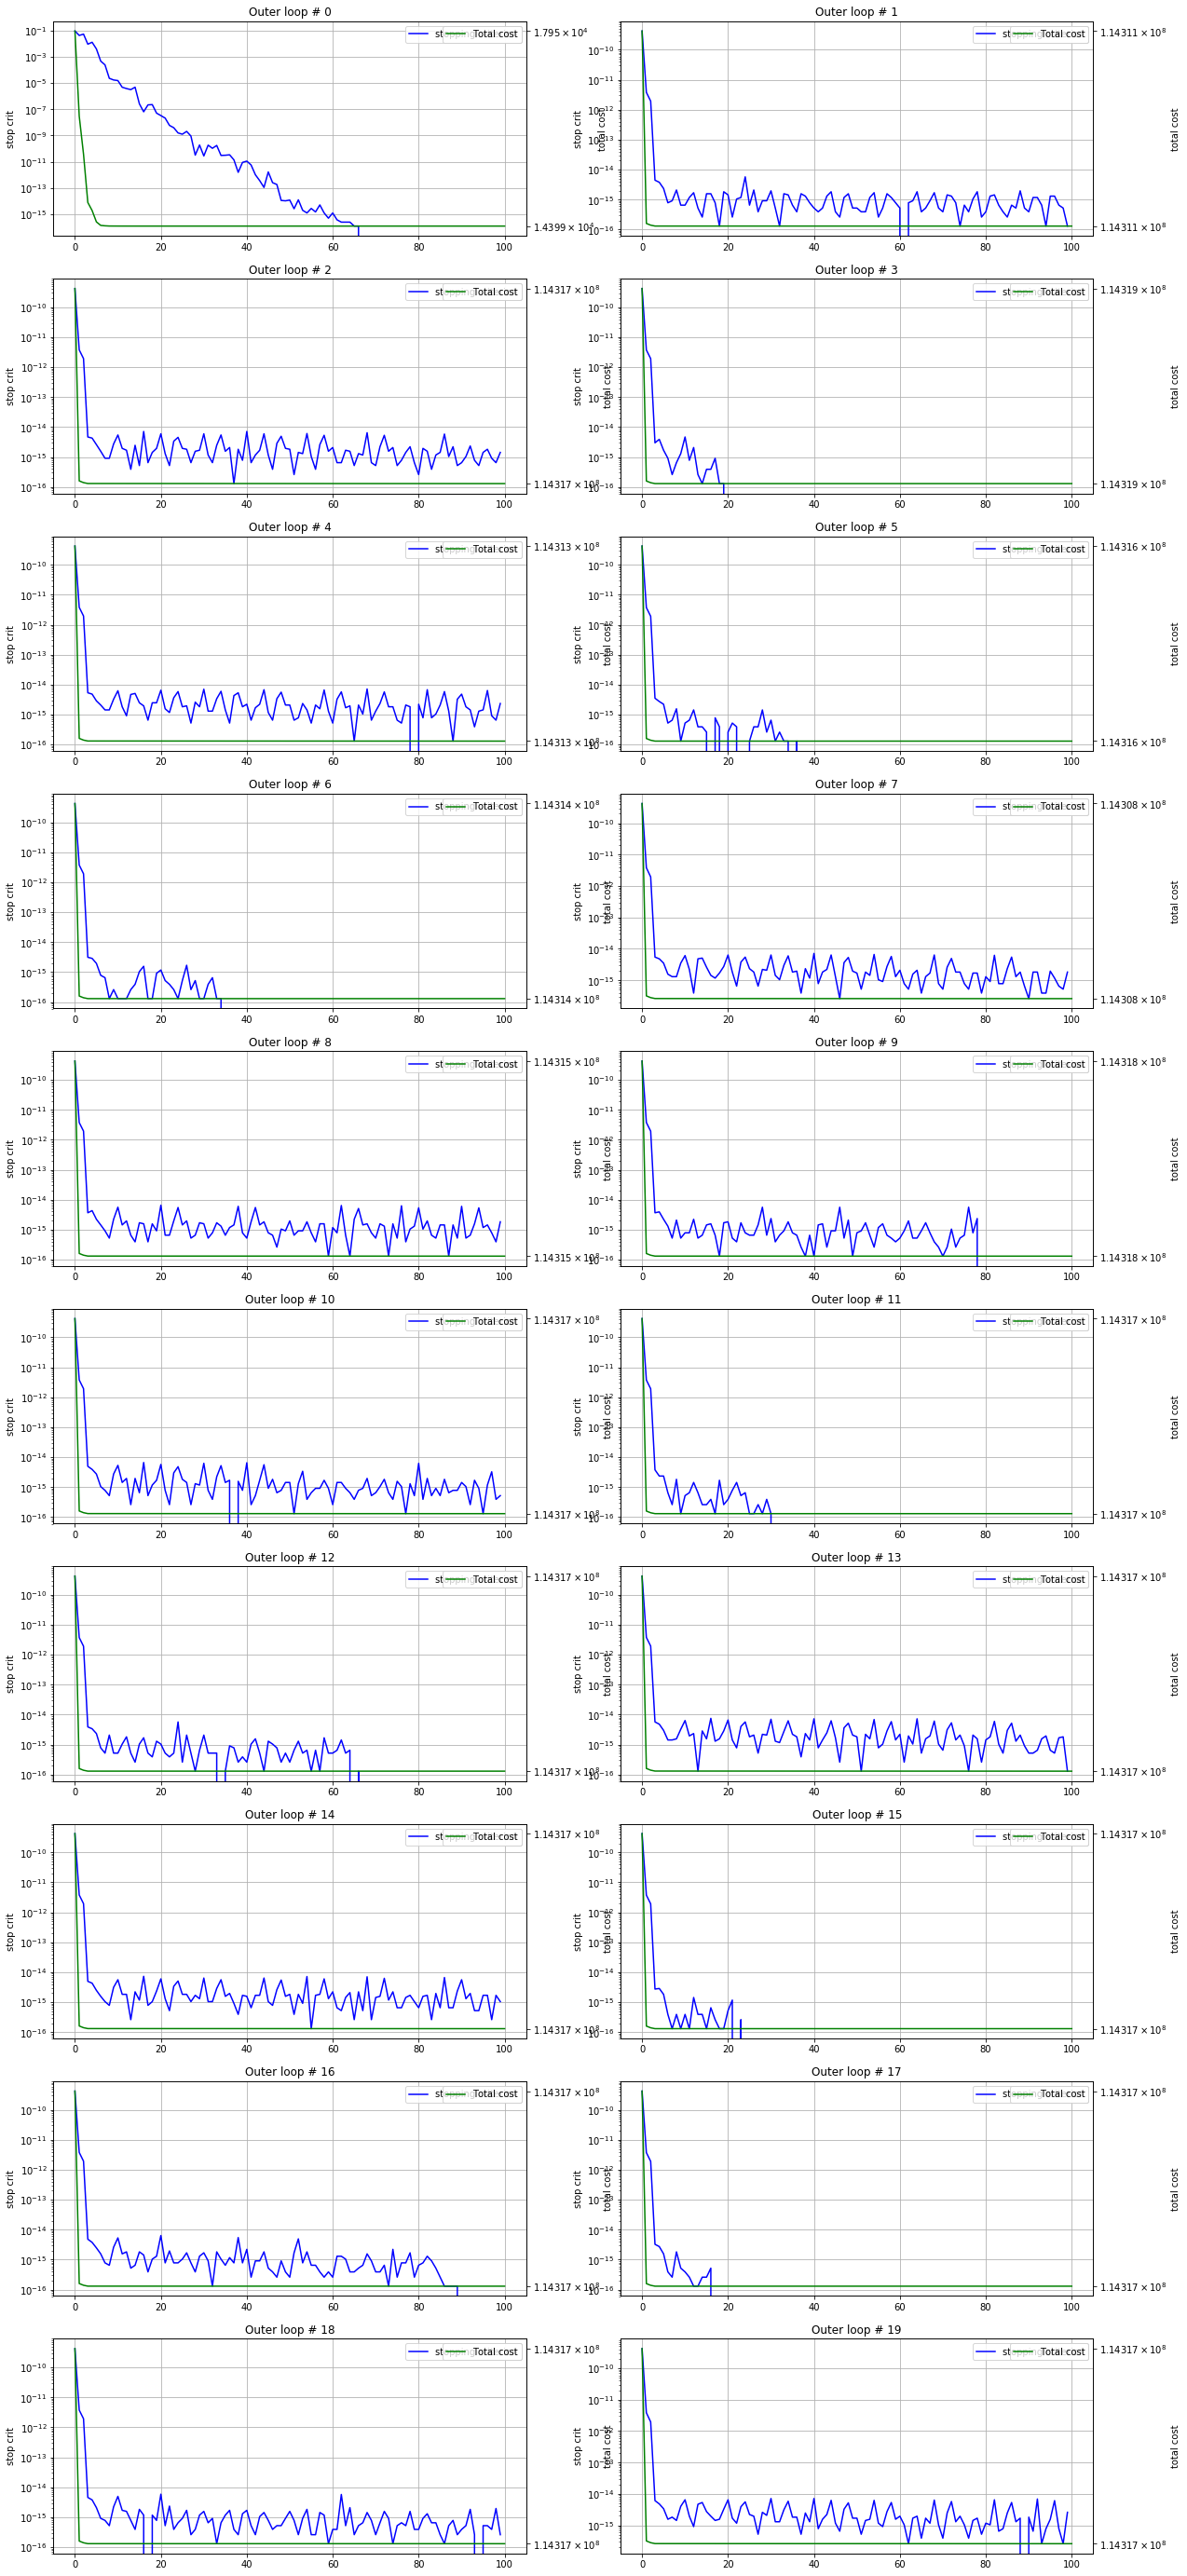

In [125]:
plot_stop_and_cost(opt_res)

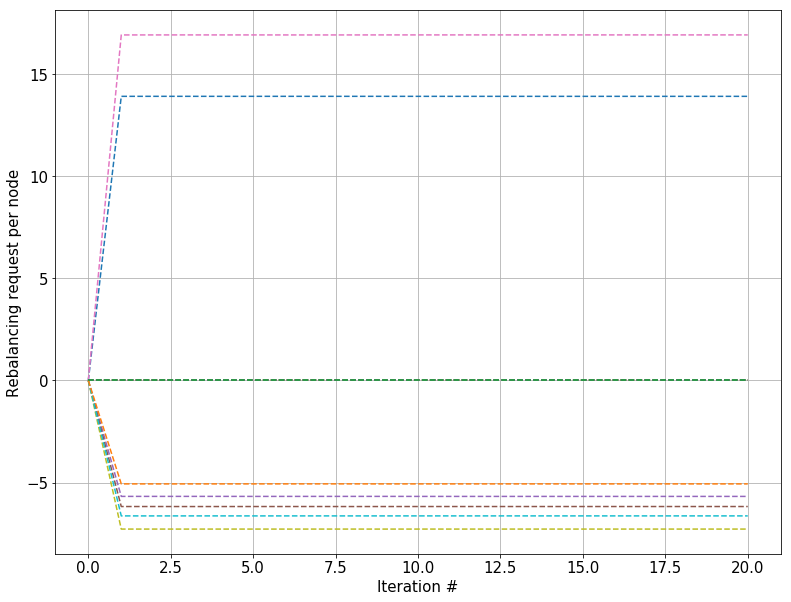

In [126]:
plot_ri_list(ri_FW, save = False, path = None)

The smoothing should be there from iteration 10 only. 

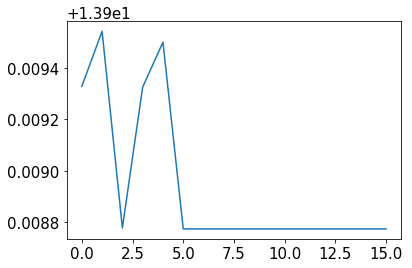

In [127]:
r0 = []
for ri in ri_FW:
    r0.append(ri['0'])

plt.plot(r0[5:])

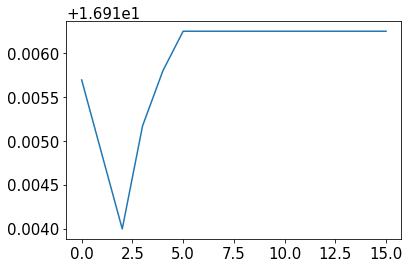

In [128]:
r1 = []
for ri in ri_FW:
    r1.append(ri['5'])

plt.plot(r1[5:])

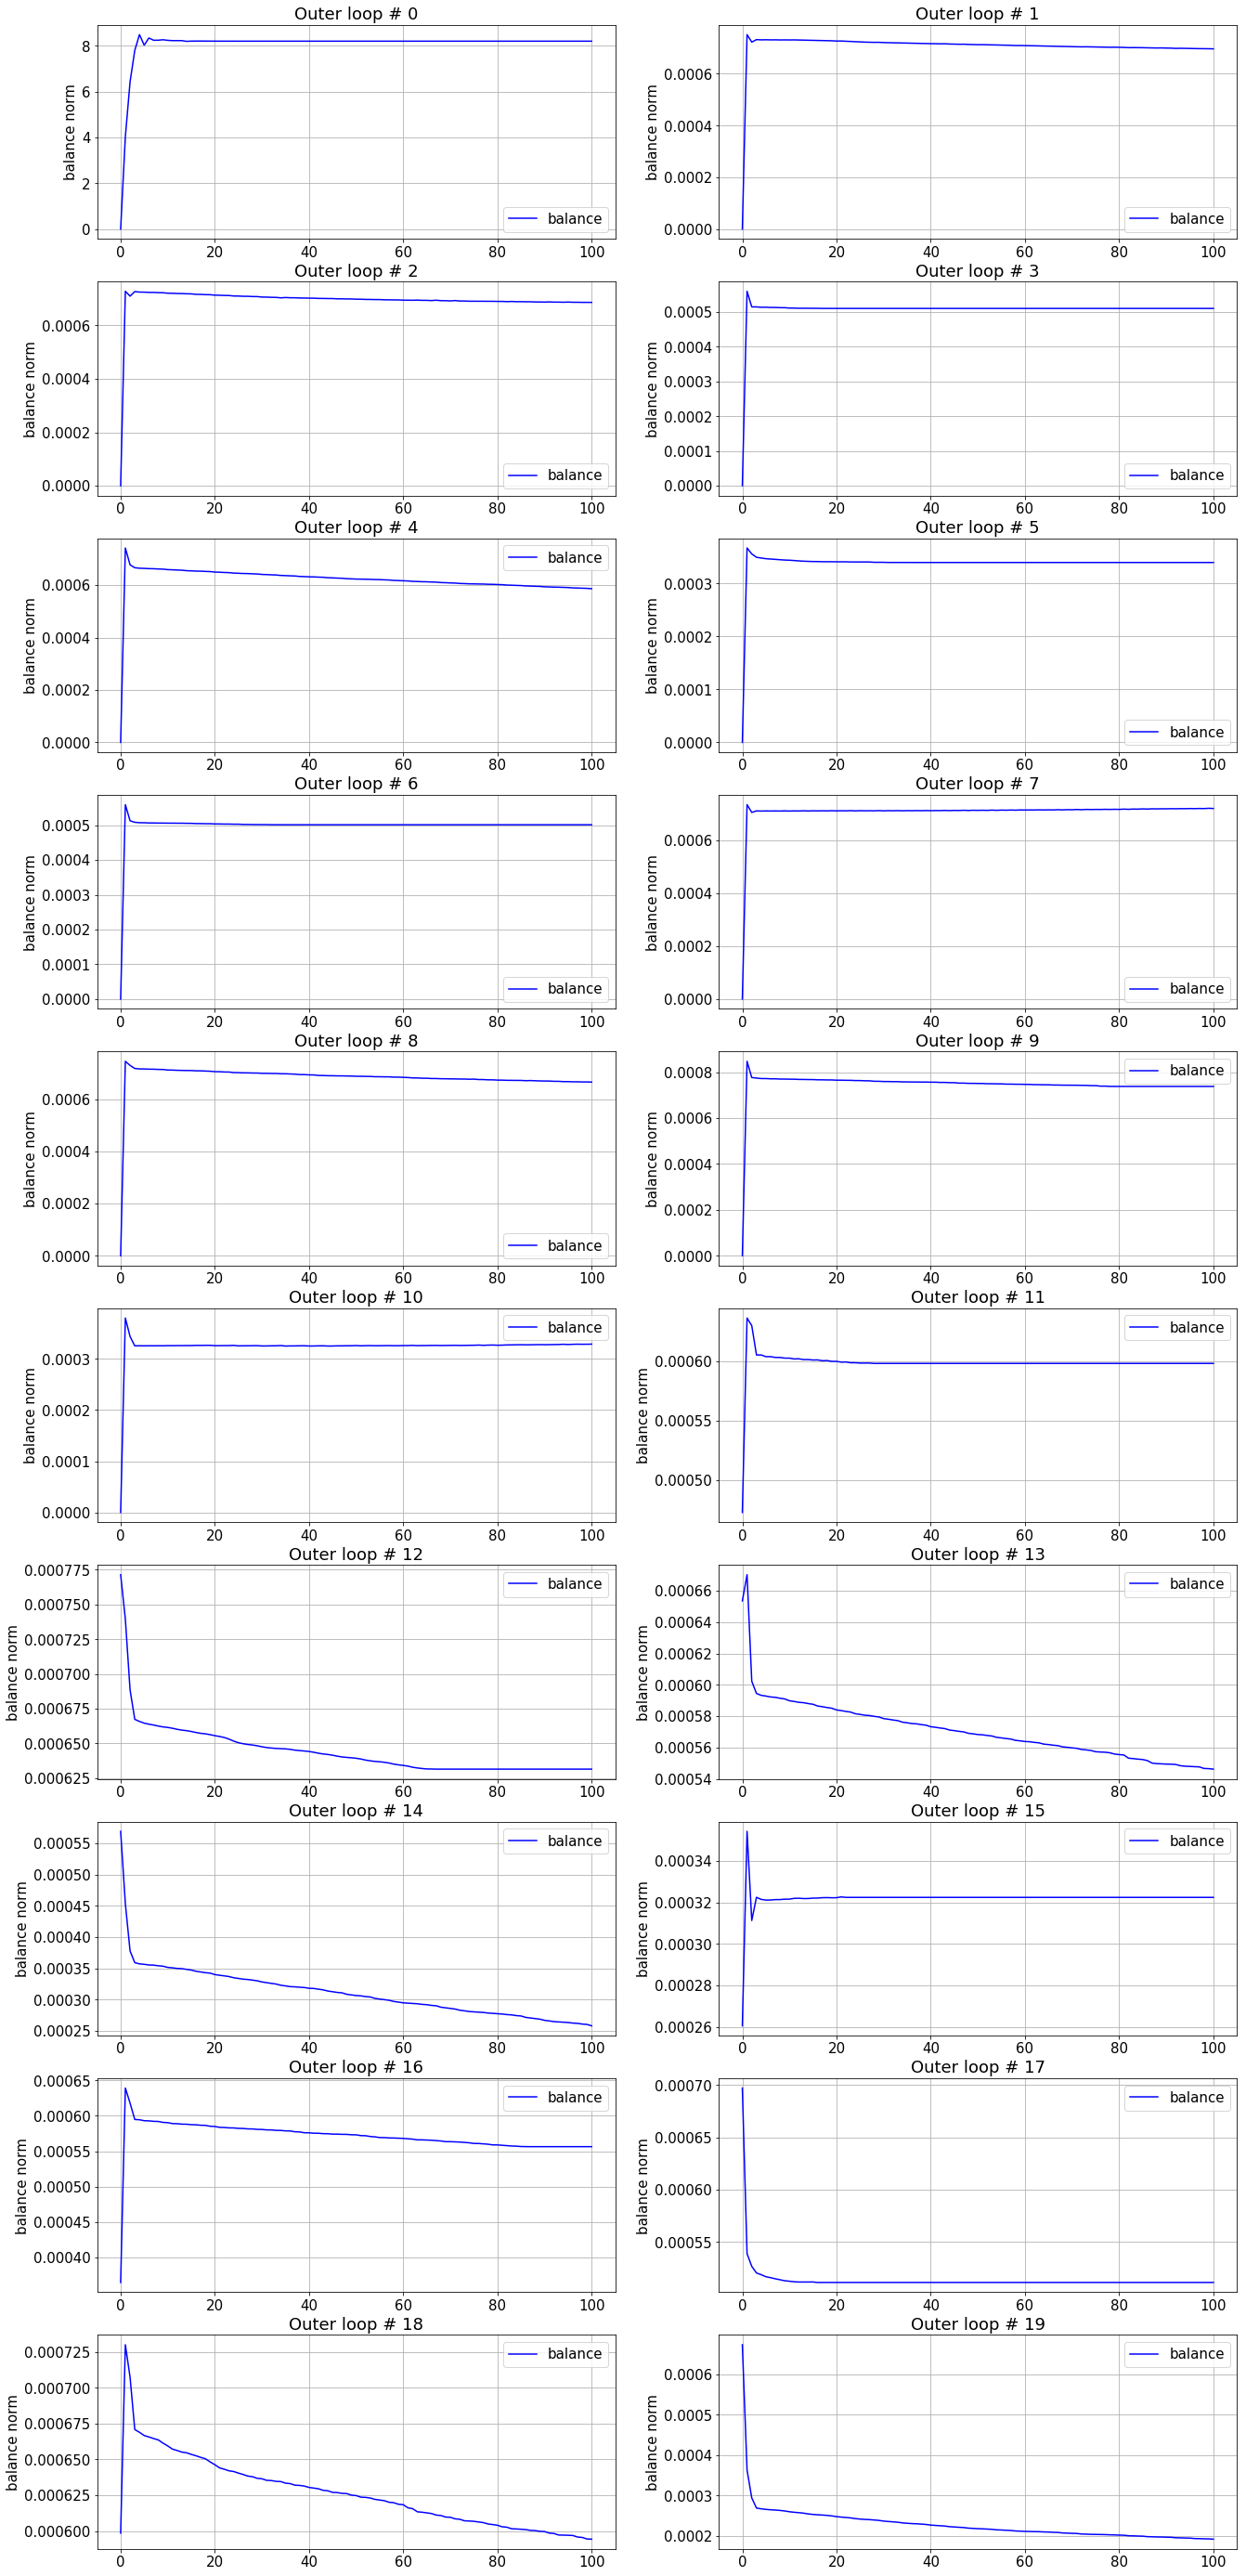

In [129]:
plot_balance_list(balance_list, b_scale='linear', n_lims = None)

No handles with labels found to put in legend.


Text(0, 0.5, 'Balance Norm')

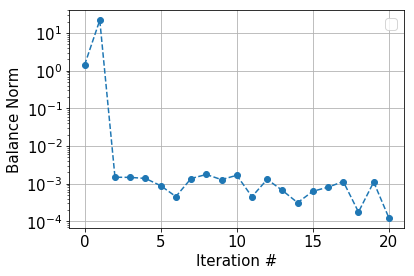

In [130]:
b=np.linalg.norm(balance, axis=1)
plt.plot(np.array(b), 'o--')
plt.grid(True)
plt.legend()
plt.yscale('log')
plt.xticks(np.arange(0, 21, step=5))
plt.xlabel('Iteration #')
plt.ylabel('Balance Norm')

## Validation L = 100000

In [131]:
n_nodes=10

In [132]:
path='Data/'+str(n_nodes)+'Nodes/outputs/'+subfolder

In [133]:
print(os.listdir(path))

['back_ls_NN_init_ni_100_ri_smoothing.pkl', 'init_nearest_with_step.pkl', 'ni_to_10000.pkl', 'init_passengers.pkl', 'initial_setup.pkl', 'no_to_100_withCarriedOverStepSize.pkl', 'back_ls_NN_init_ri_smoothing_L_100000.pkl', 'back_LS_ni_50.pkl', 'no_to_500_withCarriedOverStepSize.pkl', 'back_ls_NN_init_ni_100.pkl', 'back_ls_NN_init_ni_50.pkl', 'back_ls_NN_init.pkl', 'backtracking_line_search.pkl', 'back_ls_NN_init_ri_smoothing_L_1000000.pkl', 'ni_to_5000.pkl', 'init_nearest_with_step_decrease.pkl', 'init_nearest.pkl']


In [142]:
with open(os.path.join(path, 'back_ls_NN_init_ri_smoothing_L_1000000.pkl'), 'rb') as f:
        G_FW, OD, ri_FW, n_outer, n_inner, balance, opt_res, OD_list, balance_list, params = pickle.load(f)

In [143]:
params

{'L': 1000000,
 'ni': 100,
 'no': 20,
 'ev': False,
 'sc': 'relative_progress',
 'fu': False,
 'ri_smoothing': False,
 'update_factor': False,
 'FW_tol': 0,
 'tol': 0}

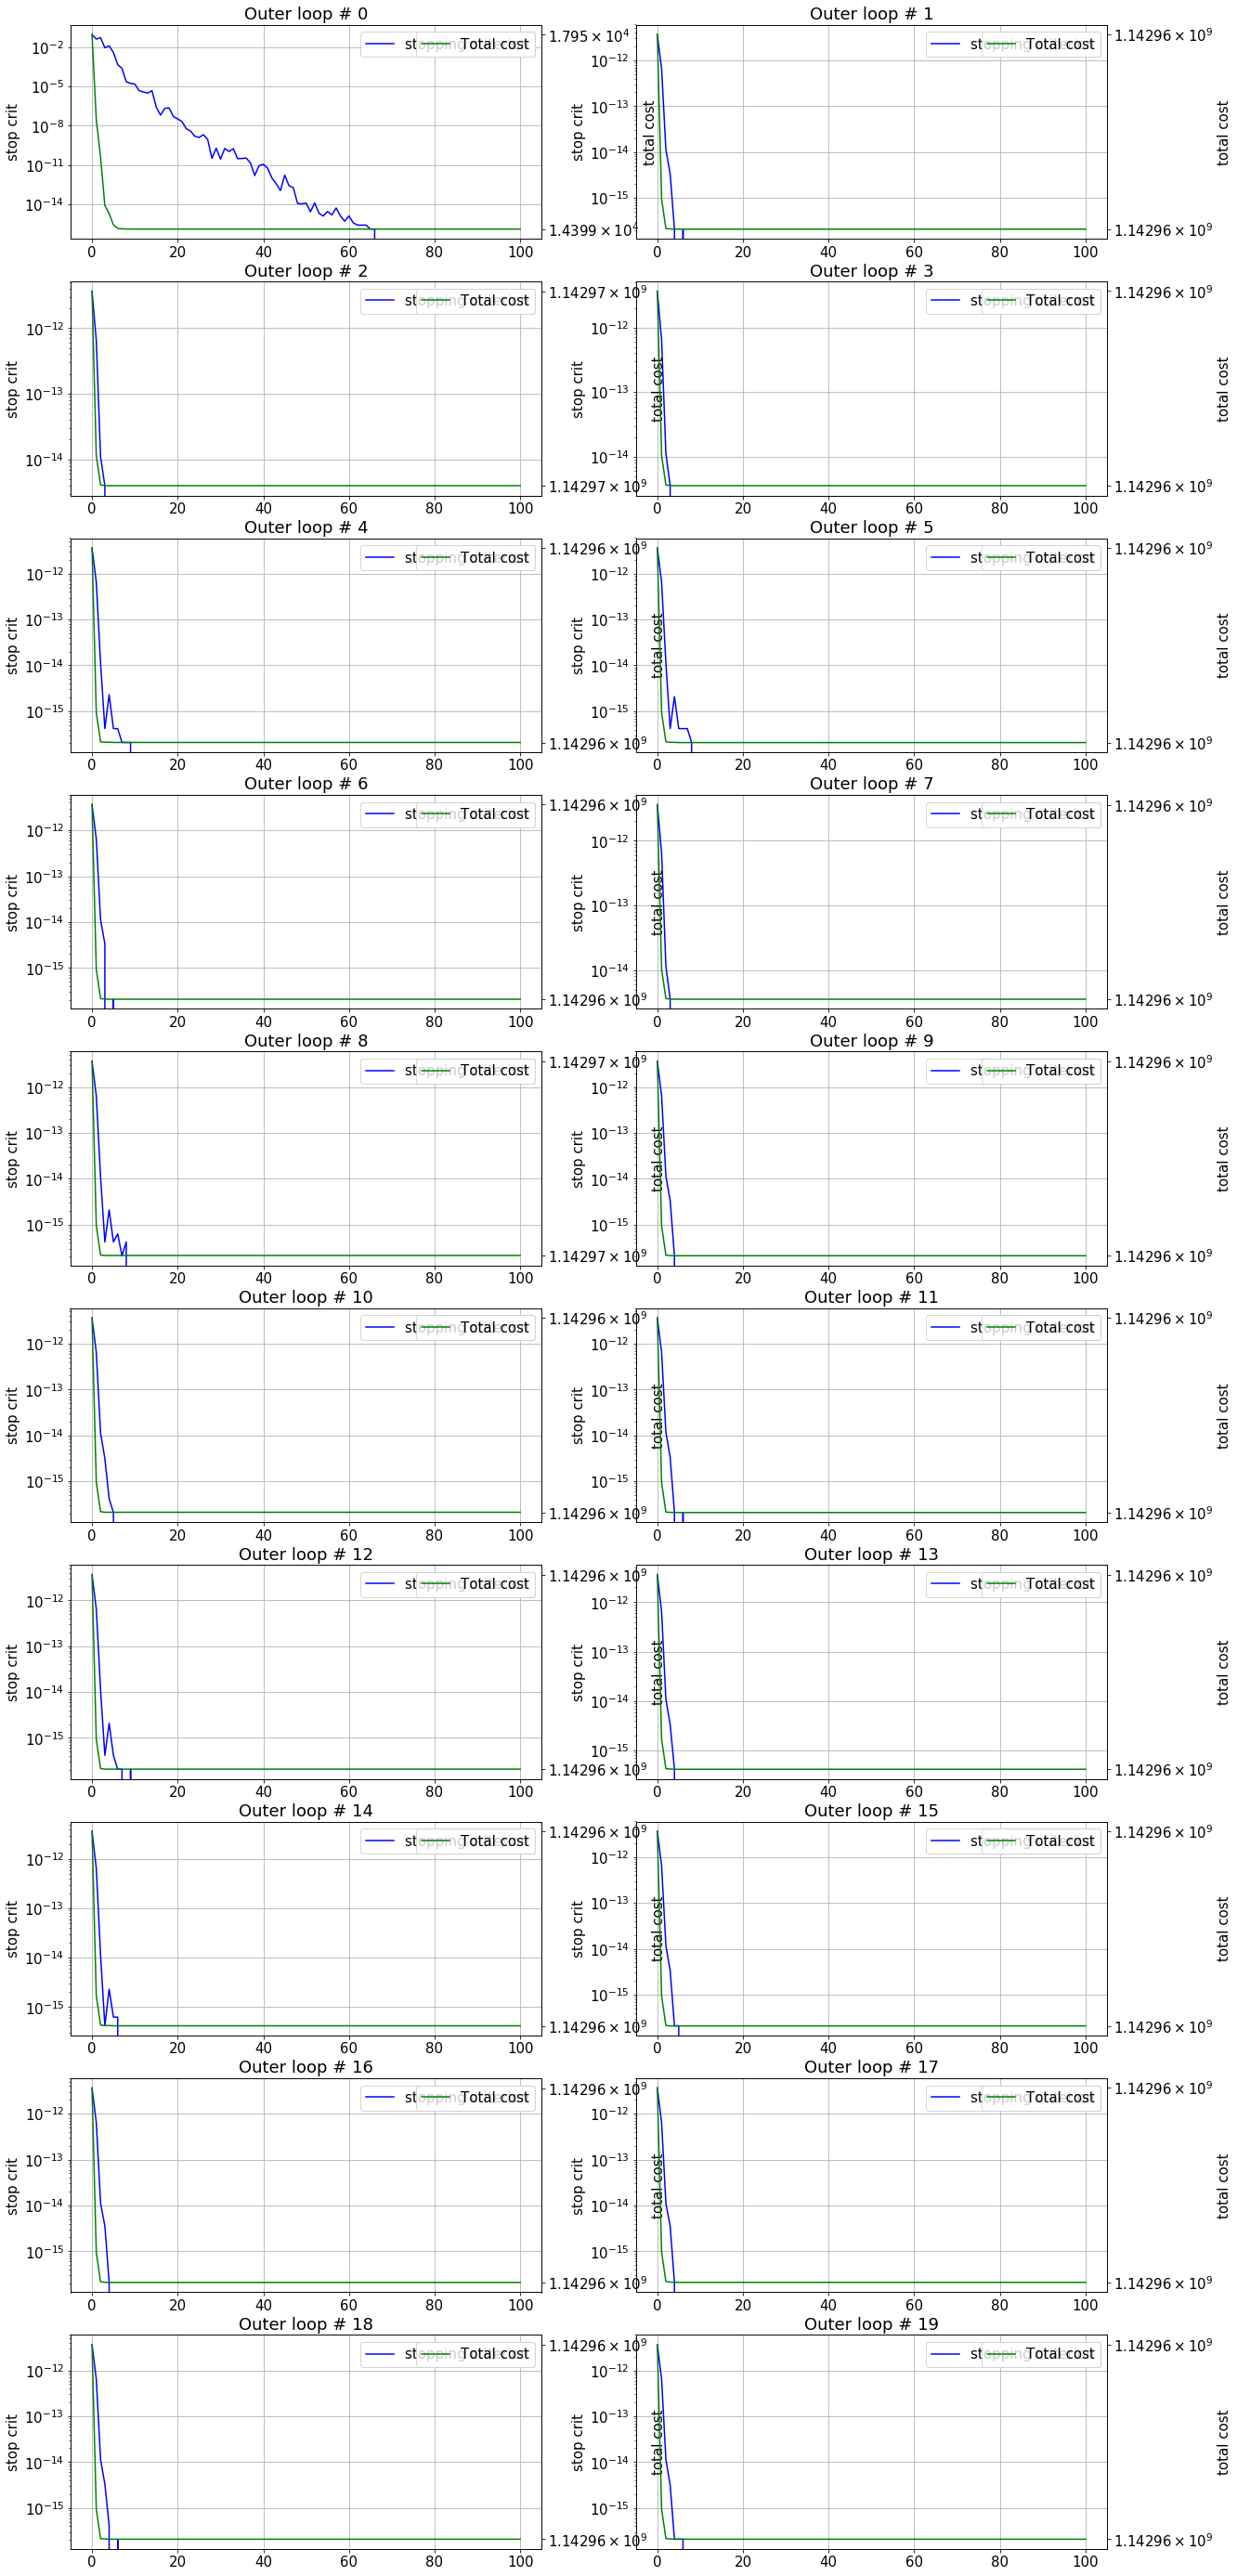

In [144]:
plot_stop_and_cost(opt_res)

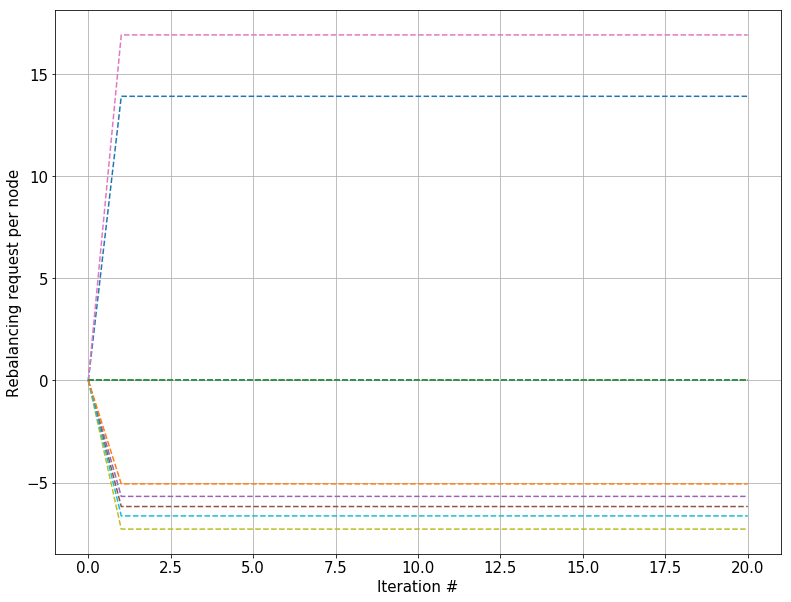

In [137]:
plot_ri_list(ri_FW, save = False, path = None)

The smoothing should be there from iteration 10 only. 

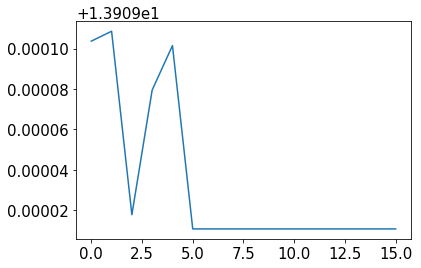

In [138]:
r0 = []
for ri in ri_FW:
    r0.append(ri['0'])

plt.plot(r0[5:])

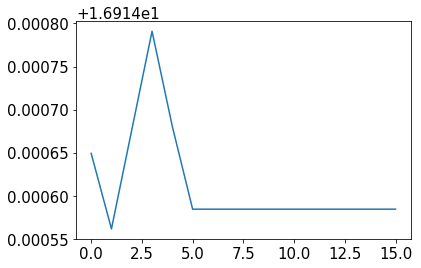

In [139]:
r1 = []
for ri in ri_FW:
    r1.append(ri['5'])

plt.plot(r1[5:])

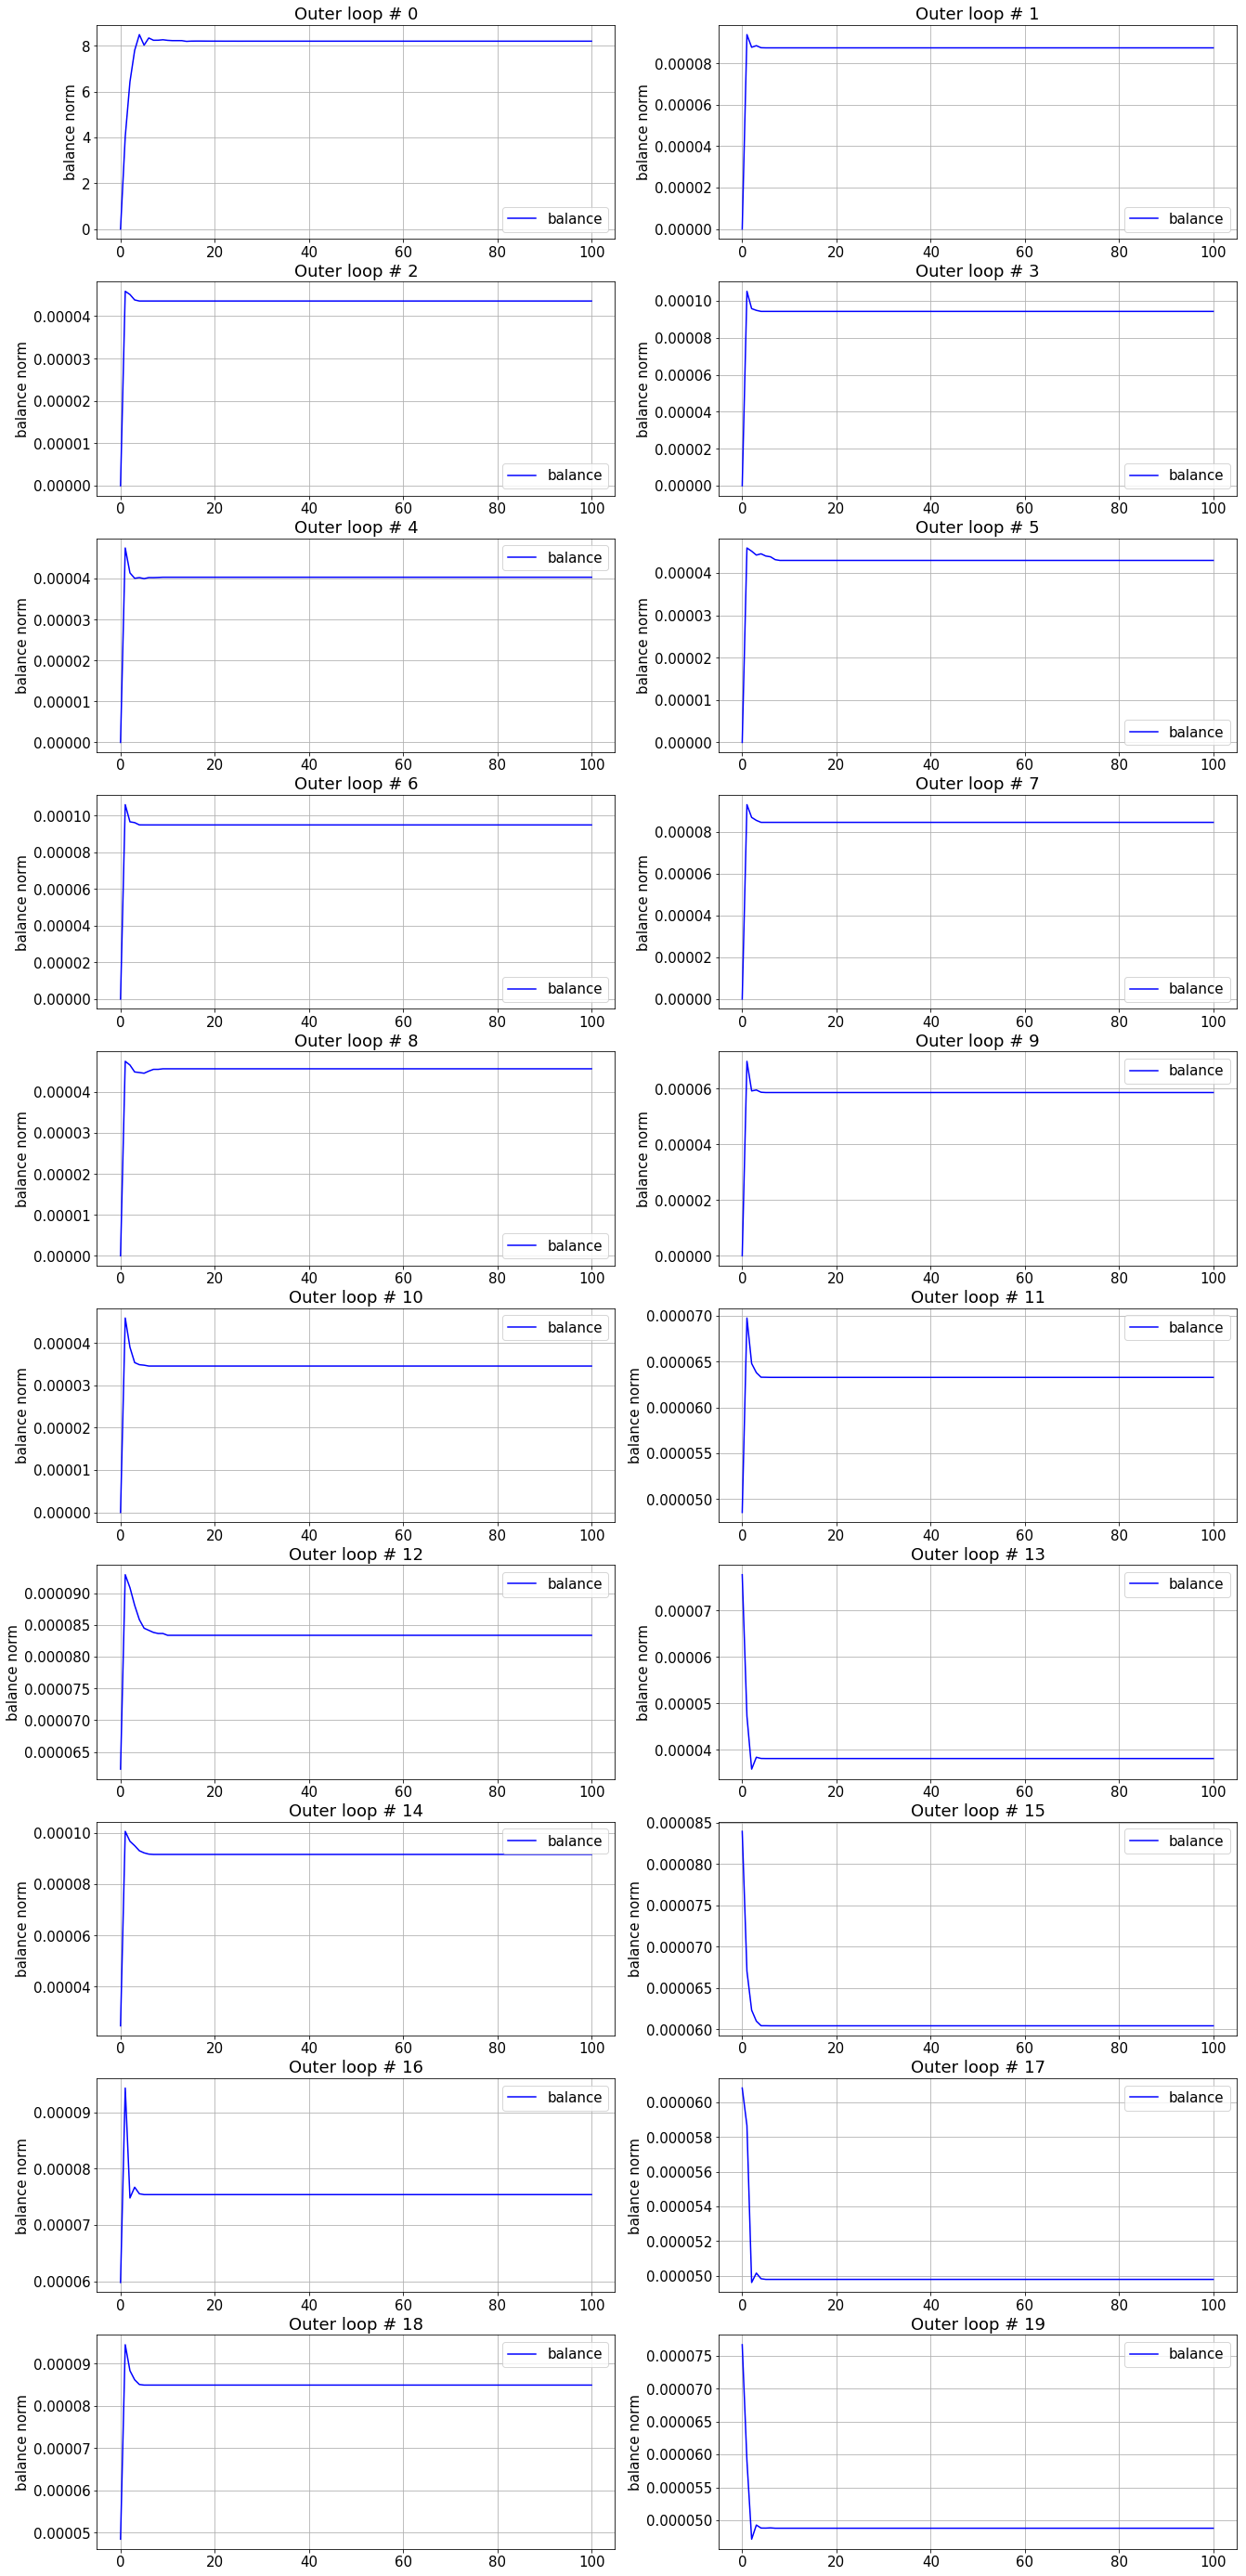

In [140]:
plot_balance_list(balance_list, b_scale='linear', n_lims = None)

No handles with labels found to put in legend.


Text(0, 0.5, 'Balance Norm')

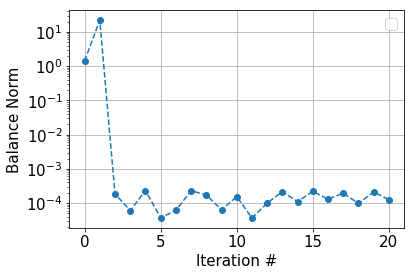

In [141]:
b=np.linalg.norm(balance, axis=1)
plt.plot(np.array(b), 'o--')
plt.grid(True)
plt.legend()
plt.yscale('log')
plt.xticks(np.arange(0, 21, step=5))
plt.xlabel('Iteration #')
plt.ylabel('Balance Norm')

# Quickly re-convincing myself that the init was working

Below is the initial setup. We see that indeed the flows are initialized on a shortest paths basis. The reason that the rebalancing flow 0 to R is "exact" is simply because there is only one path between 1 and R. 

In [27]:
for e in G_FW1[-1][0].edges():
    print(e, G_FW1[-1][0][e[0]][e[1]]['f_m']+G_FW1[-1][0][e[0]][e[1]]['f_r'])

('0', '1') 10
('0', 'R') 6.494304099094502
('0', '1_p') 10
('0', '0_p') 0
('1', '0') 16.494304099094503
('1', 'R') 0
('1', '0_p') 10
('1', '1_p') 0


Below is the new initialization. We compare the last flows at iteration t_f-1 and the first one at t_f. We see the flows are nearly identical, even for the rebalancing edges, indicating a probably good initialization. 

In [41]:
for e in G_FW2[-2][-1].edges():
    print(e, G_FW2[-2][-1][e[0]][e[1]]['f_m'], ' ---', G_FW2[-2][-1][e[0]][e[1]]['f_r'])

('0', '1') 9.271206380857432  --- 7.32810645968178e-17
('0', 'R') 0.0  --- 6.481575274177471
('0', '1_p') 2.7896311066799595  --- 0.0
('0', '0_p') 0.7287936191425722  --- 0.0
('1', '0') 2.7896311066799595  --- 6.481575274177471
('1', 'R') 0.0  --- 0
('1', '0_p') 9.271206380857432  --- 0.0
('1', '1_p') 7.210368893320038  --- 0.0


In [43]:
for e in G_FW2[-1][0].edges():
    print(e, G_FW2[-1][0][e[0]][e[1]]['f_m'], '---',G_FW2[-1][0][e[0]][e[1]]['f_r'])

('0', '1') 9.271206380857432 --- 3.675052529058022e-11
('0', 'R') 0.0 --- 6.481575274177394
('0', '1_p') 2.7896311066799595 --- 0
('0', '0_p') 0.7287936191425722 --- 0
('1', '0') 2.7896311066799595 --- 6.481575274214138
('1', 'R') 0.0 --- 0
('1', '0_p') 9.271206380857432 --- 0
('1', '1_p') 7.210368893320038 --- 0


We also see that the ri barely budge between those two outer iterations. 

In [44]:
ri_FW2[-2]

{'0': 6.481575274177473,
 '0_p': 0.0,
 '1': -6.481575274177473,
 '1_p': 0.0,
 'R': 0.0}

In [35]:
ri_FW2[-1]

{'0': 6.481575274177473,
 '0_p': 0.0,
 '1': -6.481575274177473,
 '1_p': 0.0,
 'R': 0.0}

However, as we also see, the balances do move significantly, by several orders of magnitude. 

Is there an issue in the way we compute those balances? 

In [48]:
balance_list[-2][-2]

0.007036849451642623

In [49]:
balance_list[-1][0]

2.3456164838817126

### Checking the way we compute the balance

In [51]:
from amod_ed.result_analysis import check_flow_cons, check_flow_cons_at_OD_nodes

In [52]:
len(OD_list)b


21

In [55]:
G_ = G_FW2[-1][0]
OD_ = OD_list[-1][0]

In [58]:
check_flow_cons_at_OD_nodes(G_, OD)

array([-8.52651283e-14,  8.52651283e-14])

In [92]:
check_flow_cons_at_OD_nodes(G_FW3[4][0],OD)

array([ 8.15347789e-13, -8.15347789e-13])

In [85]:
for e in G_FW3[2][0].edges():
    print(e, G_FW3[2][0][e[0]][e[1]]['f_m']+G_FW3[2][0][e[0]][e[1]]['f_r'])

('0', '1') 9.260380339946323
('0', 'R') 5.961643147273303
('0', '1_p') 3.29873719095276
('0', '0_p') 0.7396196617753502
('1', '0') 9.26038033994619
('1', 'R') 0.0
('1', '0_p') 9.260380338224643
('1', '1_p') 6.701262809047239


In [88]:
for e in G_FW3[3][0].edges():
    print(e, G_FW3[3][0][e[0]][e[1]]['f_m']+G_FW3[3][0][e[0]][e[1]]['f_r'])

('0', '1') 9.271206359867902
('0', 'R') 6.368394004482321
('0', '1_p') 2.902812354785313
('0', '0_p') 0.7287936407298528
('1', '0') 9.271206359868293
('1', 'R') 0.0
('1', '0_p') 9.271206359270154
('1', '1_p') 7.097187645214674


In [87]:
for e in G_FW3[2][0].edges():
    print(e, G_FW3[-1][-1][e[0]][e[1]]['f_m']+G_FW3[-1][-1][e[0]][e[1]]['f_r'])

('0', '1') 9.275904148073344
('0', 'R') 6.492276293458436
('0', '1_p') 2.7838461955103853
('0', '0_p') 0.7243238470154952
('1', '0') 9.276350484056659
('1', 'R') 0.0
('1', '0_p') 9.275676152984518
('1', '1_p') 7.216153804489607
